<a href="https://colab.research.google.com/github/Yousufalipangat/Analysis-of-AMEO-Data/blob/main/Analysis_of_AMEO_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of AMEO Data**

# Introduction

# Dataset Description

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

# Objective

This exploratory data analysis's (EDA) objective is to thoroughly examine the dataset that has been provided, with a focus on figuring out how different variables relate to the target variable, **salary**.

The primary objectives of this analysis encompass:

* Identify and address data quality issues such as missing values and outliers.

* Explore the distribution of variables to uncover patterns and trends.

* Investigate relationships between salary variable to other variables

* Detect and handle anomalies or unusual observations.

* Provide actionable insights for decision-making based on analysis findings.

* Validate assumptions made during data collection or modeling processes.

* Communicate analysis results effectively using visualizations and reports.






# Setting up dataset and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.xlsx - Sheet1.csv').iloc[:,1:]
df.head(4)

ID     Salary          DOJ      DOL               Designation  \
0  203097   420000.0  6/1/12 0:00  present   senior quality engineer   
1  579905   500000.0  9/1/13 0:00  present         assistant manager   
2  810601   325000.0  6/1/14 0:00  present          systems engineer   
3  267447  1100000.0  7/1/11 0:00  present  senior software engineer   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   

                          10board  ...  ComputerScience  MechanicalEngg  \
0  board ofsecondary education,ap  ...               -1              -1   
1                            cbse  ...               -1              -1   
2                            cbse  ...               -1              -1   
3                            cbse  ...               -1              -1   

  ElectricalEngg  TelecomEngg  CivilEngg conscientiousness agreeableness  \
0             -1           -1         -1            0.9737        0.8128   
1             -1           -1         -1           -0.7335        0.3789   
2             -1           -1         -1            0.2718        1.7109   
3             -1           -1         -1            0.0464        0.3448   

   extraversion  nueroticism  openess_to_experience  
0        0.5269       1.3549                -0.4455  
1        1.2396      -0.1076                 0.8637  
2        0.1637      -0.8682                 0.6721  
3       -0.3440      -0.4078                -0.9194  

[4 rows x 38 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [ ]:
df.columns = [ col.lower() for col in df.columns]

In [ ]:

def  non_vis_categorical_analysis(data):

  print('Total Records :' , data.count())
  print('Total Unique Records : ', data.nunique())
  print('All Unique values sorted : ', np.sort(data.unique()))
  print('-'*30)


In [ ]:
for col in df.select_dtypes('O').columns:
  print('Column Name : ',col)
  non_vis_categorical_analysis(df[col])

Column Name :  doj
Total Records : 3998
Total Unique Records :  81
All Unique values sorted :  ['1/1/06 0:00' '1/1/10 0:00' '1/1/11 0:00' '1/1/12 0:00' '1/1/13 0:00'
 '1/1/14 0:00' '1/1/15 0:00' '10/1/10 0:00' '10/1/11 0:00' '10/1/12 0:00'
 '10/1/13 0:00' '10/1/14 0:00' '11/1/08 0:00' '11/1/09 0:00'
 '11/1/10 0:00' '11/1/11 0:00' '11/1/12 0:00' '11/1/13 0:00'
 '11/1/14 0:00' '11/1/15 0:00' '12/1/10 0:00' '12/1/11 0:00'
 '12/1/12 0:00' '12/1/13 0:00' '12/1/14 0:00' '12/1/15 0:00' '2/1/07 0:00'
 '2/1/10 0:00' '2/1/11 0:00' '2/1/12 0:00' '2/1/13 0:00' '2/1/14 0:00'
 '2/1/15 0:00' '3/1/10 0:00' '3/1/11 0:00' '3/1/12 0:00' '3/1/13 0:00'
 '3/1/14 0:00' '3/1/15 0:00' '4/1/10 0:00' '4/1/11 0:00' '4/1/12 0:00'
 '4/1/13 0:00' '4/1/14 0:00' '4/1/15 0:00' '5/1/10 0:00' '5/1/11 0:00'
 '5/1/12 0:00' '5/1/13 0:00' '5/1/14 0:00' '5/1/15 0:00' '6/1/07 0:00'
 '6/1/09 0:00' '6/1/10 0:00' '6/1/11 0:00' '6/1/12 0:00' '6/1/13 0:00'
 '6/1/14 0:00' '6/1/15 0:00' '6/1/91 0:00' '7/1/07 0:00' '7/1/10 0:00'
 '7/1

# Data Cleaning and Munging

Going through the above displayed catergorical values, below are the some the changes required.


* doj,  dol and dob columns are in Object datatype, not in datetime.

* Most of the columns contains lower and upper case issue, in addition leading and trailing spaces causing duplicate records

* dol column contains a value **'present'** which is not a valid date format

* jobcity column contains city names which have spelling mistakes, also **'-1'** value

* designation columns used several short cuts like jr., sr. ,eng etc.

* Value **'0'** contained in 10board column has to be treated or dropped

* In 10board column , spaces between words are missing and creating duplicate values.

* Also abbriviation in 10board and 12board has to be treated

* In column specialization, special symbols like '&' are used instead of 'and'
and 'eng' for engineering.

In [ ]:
cln_df = df.copy()

**1. Datatype conversion:**

As the date related columns are not in datetime datatype. so we need to change it:

In [ ]:
cln_df['doj'] = pd.to_datetime(cln_df.doj)

In [ ]:
cln_df['dob'] = pd.to_datetime(cln_df.dob)

The survey was conducted on 2015 , and the dol (date of leaving) columns contain value as **'present'** . We are making an assumption that the respondent left the company on the same year. so we are replacing the value of 'present' to '31-12-2015'



In [ ]:
cln_df.loc[cln_df['dol'] == 'present','dol'] = '31-12-2015'

In [ ]:
cln_df['dol'] = pd.to_datetime(cln_df.dol)

<ipython-input-446-070a7a0c2e60>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cln_df['dol'] = pd.to_datetime(cln_df.dol)


**2. Remove the lead and trail spaces and convert the values to lowercase**


In [ ]:
cat_fields = cln_df.select_dtypes('O').columns

In [ ]:
cat_fields

Index(['designation', 'jobcity', 'gender', '10board', '12board', 'degree',
       'specialization', 'collegestate'],
      dtype='object')

In [ ]:
for col in cat_fields:
  cln_df[col]  = cln_df[col].str.strip().str.lower()

In [ ]:
cln_df.tail(3)

id    salary        doj        dol                  designation  \
3995  355888  320000.0 2013-07-01 2015-12-31  associate software engineer   
3996  947111  200000.0 2014-07-01 2015-01-01           software developer   
3997  324966  400000.0 2013-02-01 2015-12-31      senior systems engineer   

               jobcity gender        dob  10percentage      10board  ...  \
3995         bangalore      m 1991-07-03         81.86   bse,odisha  ...   
3996  asifabadbanglore      f 1992-03-20         78.72  state board  ...   
3997           chennai      f 1991-02-26         70.60         cbse  ...   

      computerscience  mechanicalengg electricalengg  telecomengg  civilengg  \
3995               -1              -1             -1           -1         -1   
3996              438              -1             -1           -1         -1   
3997               -1              -1             -1           -1         -1   

     conscientiousness agreeableness  extraversion  nueroticism  \
3995           -1.5765       -1.5273       -1.5051     -1.31840   
3996           -0.1590        0.0459       -0.4511     -0.36120   
3997           -1.1128       -0.2793       -0.6343      1.32553   

      openess_to_experience  
3995                -0.7615  
3996                -0.0943  
3997                -0.6035  

[3 rows x 38 columns]

**3. correct spelling mistakes in jobcity column**



In [ ]:
unique_cities = cln_df.jobcity.unique()
unique_cities.sort()
unique_cities

array(['-1', 'a-64,sec-64,noida', 'agra', 'ahmedabad', 'ahmednagar',
       'al jubail,saudi arabia', 'allahabad', 'alwar', 'am', 'ambala',
       'ambala city', 'angul', 'ariyalur', 'asansol', 'asifabadbanglore',
       'aurangabad', 'australia', 'baddi hp', 'bahadurgarh', 'banagalore',
       'banaglore', 'bangalore', 'banglore', 'bankura', 'bareli',
       'baripada', 'baroda', 'bathinda', 'beawar', 'belgaum', 'bellary',
       'bengaluru', 'bhagalpur', 'bharuch', 'bhilai', 'bhiwadi', 'bhopal',
       'bhubaneshwar', 'bhubaneswar', 'bhubneshwar', 'bihar', 'bikaner',
       'bilaspur', 'bulandshahar', 'bundi', 'burdwan', 'calicut',
       'chandigarh', 'chandrapur', 'chennai', 'chennai & mumbai',
       'chennai, bangalore', 'cheyyar', 'coimbatore', 'daman and diu',
       'dammam', 'dausa', 'dehradun', 'delhi', 'delhi/ncr', 'dhanbad',
       'dharamshala', 'dharmapuri', 'dharuhera', 'dubai', 'durgapur',
       'ernakulam', 'faridabad', 'gagret', 'gajiabaad', 'gandhi nagar',
       '

In [ ]:
cln_df['jobcity'].replace({
    "a-64,sec-64,noida" : "noida",
    "ambala city":'ambala',
    'banagalore':"bangalore",
    'banaglore':"bangalore",
    'banglore':"bangalore",
    "bengaluru":"bangalore",
    'bhubaneshwar':'bhubaneswar',
    'bhubneshwar':'bhubaneswar',
    "delhi/ncr":'delhi',
    "gandhinagar":"gandhi nagar",
    "gaziabaad":"gaziabad",
    "greater noida":'noida',
    'guragaon':'gurgaon',
    'gurgoan':'gurgaon',
    'muzzafarpur':'muzaffarpur',
    'new dehli':'new delhi',
    'new delhi - jaisalmer':'new delhi',
    'nouda':'noida',
    'hderabad' : 'hyderabad',
    'hyderabad(bhadurpally)' :'hyderabad',
    'kochi/cochin':'kochi',
    'kochi/cochin, chennai and coimbatore' :'kochi, chennai and coimbatore',
    'kolkata`':'kolkata',
    'pondi':'pondicherry',
    'pondy':'pondicherry',
    'punr':'pune',
    'sonepat':'sonipat',
    'technopark, trivandrum':'thiruvananthapuram',
    'tirupathi':'tirupati',
    'trivandrum':'thiruvananthapuram'
}, inplace= True)

**4.The designation column contains several abbreviation and shortcuts. let's replace it with fullform for better visibility**

In [ ]:
cln_df.designation = cln_df.designation.str.replace('asst.',r'assistant')
cln_df.designation = cln_df.designation.str.replace('jr.','junior')
cln_df.designation = cln_df.designation.str.replace('sr.','senior')
cln_df.designation = cln_df.designation.str.replace('operation ','operations ')
cln_df.designation = cln_df.designation.str.replace('system ','systems ')
cln_df.designation = cln_df.designation.str.replace(' system ',' systems ')
cln_df.designation = cln_df.designation.str.replace(' engg',' engineer')
cln_df.designation = cln_df.designation.str.replace(' eng$',' engineer')
cln_df.designation = cln_df.designation.str.replace('engineerte$','engineer')
cln_df.designation = cln_df.designation.str.replace('-',' ')



<ipython-input-453-839919fdad80>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cln_df.designation = cln_df.designation.str.replace('asst.',r'assistant')
<ipython-input-453-839919fdad80>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cln_df.designation = cln_df.designation.str.replace('jr.','junior')
<ipython-input-453-839919fdad80>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cln_df.designation = cln_df.designation.str.replace('sr.','senior')
<ipython-input-453-839919fdad80>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cln_df.designation = cln_df.designation.str.replace(' eng$',' engineer')
<ipython-input-453-839919fdad80>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  cln_df.designation = cln_df.designation.str.replace('engi

**5. Make the gender column values more specific**

In [ ]:
cln_df['gender'].replace({"f":'female',"m":'male'}, inplace = True)

**6. Deal the 0 and -1 contains in the different columns**




In [ ]:
(cln_df == '-1').sum()[lambda x :  x > 0]/len(cln_df)*100

jobcity    11.530765
dtype: float64

In [ ]:
cln_df['jobcity'].replace({'-1':np.nan}, inplace = True)
cln_df['jobcity'].fillna(cln_df['jobcity'].mode(dropna=True)[0], inplace = True)

In [ ]:
(cln_df == -1).sum()[lambda x :  x > 0]/len(cln_df)*100

domain                    6.153077
computerprogramming      21.710855
electronicsandsemicon    71.385693
computerscience          77.438719
mechanicalengg           94.122061
electricalengg           95.972986
telecomengg              90.645323
civilengg                98.949475
dtype: float64

The columns like mechanicalengg, electricalengg, telecomengg , civilengg have more than 90% of the total values as -1. Due to this these columns are no significant in our analysis and we will drop with from dataset.



In [ ]:
cln_df.drop(columns = ['mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg'], inplace =True)

In [ ]:
cln_df['domain'].replace({-1:np.nan}, inplace = True)
cln_df['computerprogramming'].replace({-1:np.nan}, inplace = True)
cln_df['electronicsandsemicon'].replace({-1:np.nan}, inplace = True)
cln_df['computerscience'].replace({-1:np.nan}, inplace = True)

cln_df['domain'].fillna(cln_df['domain'].median(), inplace= True)
cln_df['computerprogramming'].fillna(cln_df['computerprogramming'].median(), inplace= True)
cln_df['electronicsandsemicon'].fillna(cln_df['electronicsandsemicon'].median(), inplace= True)
cln_df['computerscience'].fillna(cln_df['computerscience'].median(), inplace= True)


In [ ]:
(cln_df == 0).sum()[lambda x :  x > 0]

collegecitytier    2797
graduationyear        1
dtype: int64

let's drop the graduation year with value 0

In [ ]:
cln_df.drop(cln_df[cln_df['graduationyear']== 0].index, inplace = True)


In [ ]:
cln_df['id'] = cln_df['id'].astype('category')
cln_df['collegetier'] = cln_df['collegetier'].astype('category')
cln_df['collegecityid'] = cln_df['collegecityid'].astype('category')
cln_df['collegeid'] = cln_df['collegeid'].astype('category')
cln_df['collegecitytier'] = cln_df['collegecitytier'].astype('category')


In [ ]:
(cln_df == '0').sum()[lambda x :  x > 0]

10board    350
12board    359
dtype: int64

In [ ]:
cln_df['10board'].replace({'0':np.nan}).isnull().sum()

350

In [ ]:
cln_df['10board'].replace({'0':np.nan}, inplace = True)
cln_df['10board'].fillna(cln_df['10board'].mode(dropna=True)[0], inplace = True)

cln_df['12board'].replace({'0':np.nan}, inplace = True)
cln_df['12board'].fillna(cln_df['12board'].mode(dropna=True)[0], inplace = True)

**7. Validate DOL and DOJ**

In [ ]:
(cln_df['doj'] >= cln_df['dol']).sum()

55

for 40 records the date of joining in greater than leaving. This can happene due to human error . we are goind to drop the such records from the data set.

In [ ]:
cln_df.drop(cln_df[cln_df['doj'] >= cln_df['dol']].index,inplace = True)

**8. Validate 10percentage , 12percentage and collegegpa**

In [ ]:
cln_df['10percentage'].describe()

count    3942.000000
mean       77.943747
std         9.839189
min        43.000000
25%        71.800000
50%        79.200000
75%        85.707500
max        97.760000
Name: 10percentage, dtype: float64

In [ ]:
cln_df['12percentage'].describe()

count    3942.00000
mean       74.45723
std        11.00196
min        40.00000
25%        66.00000
50%        74.40000
75%        82.55750
max        98.70000
Name: 12percentage, dtype: float64

In [ ]:
cln_df['collegegpa'].describe()

count    3942.000000
mean       71.487631
std         8.188146
min         6.450000
25%        66.400000
50%        71.700000
75%        76.400000
max        99.930000
Name: collegegpa, dtype: float64

As we observed from above table there are value less than 10 for collegegpa. respondent may updated cgpa instead of percentage. we shall convert it into percentage

In [ ]:
cln_df.loc[cln_df['collegegpa'] <= 10 , 'collegegpa'] = cln_df[cln_df['collegegpa'] <= 10 ][ 'collegegpa']*10

# Feature Engineering

**1. Derive an age column from DOB**

In [ ]:
cln_df['dob'] = pd.to_datetime(cln_df['dob'])
cln_df['age'] = 2015 - cln_df['dob'].dt.year
cln_df.head()

id     salary        doj        dol               designation  \
0  203097   420000.0 2012-06-01 2015-12-31   senior quality engineer   
1  579905   500000.0 2013-09-01 2015-12-31         assistant manager   
2  810601   325000.0 2014-06-01 2015-12-31          systems engineer   
3  267447  1100000.0 2011-07-01 2015-12-31  senior software engineer   
4  343523   200000.0 2014-03-01 2015-03-01                       get   

     jobcity  gender        dob  10percentage                         10board  \
0  bangalore  female 1990-02-19          84.3  board ofsecondary education,ap   
1     indore    male 1989-10-04          85.4                            cbse   
2    chennai  female 1992-08-03          85.0                            cbse   
3    gurgaon    male 1989-12-05          85.6                            cbse   
4    manesar    male 1991-02-27          78.0                            cbse   

   ...    domain  computerprogramming electronicsandsemicon computerscience  \
0  ...  0.635979                445.0                 333.0           407.0   
1  ...  0.960603                455.0                 466.0           407.0   
2  ...  0.450877                395.0                 333.0           407.0   
3  ...  0.974396                615.0                 333.0           407.0   
4  ...  0.124502                455.0                 233.0           407.0   

  conscientiousness agreeableness extraversion  nueroticism  \
0            0.9737        0.8128       0.5269      1.35490   
1           -0.7335        0.3789       1.2396     -0.10760   
2            0.2718        1.7109       0.1637     -0.86820   
3            0.0464        0.3448      -0.3440     -0.40780   
4           -0.8810       -0.2793      -1.0697      0.09163   

  openess_to_experience age  
0               -0.4455  25  
1                0.8637  26  
2                0.6721  23  
3               -0.9194  26  
4               -0.1295  24  

[5 rows x 35 columns]

**2. Experience column from DOJ and DOL**

In [ ]:
import datetime as dt

cln_df['experience'] = (cln_df['dol'] - cln_df['doj']).apply(lambda x : x.days/365.25)

**3 Derive a 10board categorize based on state , cbse and other**

In 10board and 12board column , the input contains around 43% cbse and 28% state. Most respondent didn't give exact name of board . so we will make sense of the columns by deriving wether the respondent studied in CBSE , state or any other. It is observed from the dataset values that the board with state name in it is a state govenment board, also have used state board abbreviations to derive the values from 10board and 12board columns

In [ ]:
cln_df['10board'].value_counts()/len(cln_df)*100

cbse                          43.759513
state board                   28.919330
icse                           7.001522
ssc                            3.069508
up board                       2.156266
                                ...    
hse,orissa                     0.025368
national public school         0.025368
nagpur board                   0.025368
jharkhand academic council     0.025368
bse,odisha                     0.025368
Name: 10board, Length: 272, dtype: float64

In [ ]:
indian_states = [
    "andhra pradesh", "arunachal pradesh", "assam", "bihar", "chhattisgarh", "goa",
    "gujarat", "haryana", "himachal pradesh", "jammu and kashmir", "jharkhand",
    "karnataka", "kerala", "madhya pradesh", "maharashtra", "manipur", "meghalaya",
    "mizoram", "nagaland", "odisha", "punjab", "rajasthan", "sikkim", "tamil nadu",
    "telangana", "tripura", "uttar pradesh", "uttarakhand", "west bengal",
    "andaman and nicobar islands", "chandigarh", "dadra and nagar haveli",
    "daman and diu", "delhi", "lakshadweep", "puducherry","up",'u p','mp','orissa' ,'ap'
]

state_board_abbreviations = [
    'apbse', 'seba', 'bseb', 'cgbse', 'gbshse', 'gseb', 'hbse', 'hpbose',
    'jkbose', 'jac', 'kseeb', 'mpbse', 'bosem', 'mbose', 'mbse', 'nbse',
    'bse_odisha', 'pseb', 'rbse', 'tnbse', 'bse_telangana', 'tbse', 'upmsp', 'ubse', 'wbbse'
]

cbse_board =[
    "central board of secondary education", "cbse"
]



def find_board(data):
  if 'state' in str(data) and  data is not np.nan :
    return 'state board'

  for state in indian_states:
    if state in str(data):
      return 'state board'


  for abbr in state_board_abbreviations:
    if abbr in str(data):
      return 'state board'

  for cbse in cbse_board:
    if cbse in str(data):
      return 'cbse'

  return 'other'

In [ ]:
cln_df['cat_12board'] = cln_df['12board'].apply(find_board)
cln_df['cat_10board'] = cln_df['10board'].apply(find_board)

In [ ]:
cln_df.head(3)

id    salary        doj        dol              designation    jobcity  \
0  203097  420000.0 2012-06-01 2015-12-31  senior quality engineer  bangalore   
1  579905  500000.0 2013-09-01 2015-12-31        assistant manager     indore   
2  810601  325000.0 2014-06-01 2015-12-31         systems engineer    chennai   

   gender        dob  10percentage                         10board  ...  \
0  female 1990-02-19          84.3  board ofsecondary education,ap  ...   
1    male 1989-10-04          85.4                            cbse  ...   
2  female 1992-08-03          85.0                            cbse  ...   

   computerscience  conscientiousness agreeableness extraversion nueroticism  \
0            407.0             0.9737        0.8128       0.5269      1.3549   
1            407.0            -0.7335        0.3789       1.2396     -0.1076   
2            407.0             0.2718        1.7109       0.1637     -0.8682   

  openess_to_experience age  experience  cat_12board  cat_10board  
0               -0.4455  25    3.581109  state board  state board  
1                0.8637  26    2.329911         cbse         cbse  
2                0.6721  23    1.582478         cbse         cbse  

[3 rows x 38 columns]

**4. Categorize the specialization values**

Let's Categorizes the sepialization values as below:

To categorize these specializations into different groups, we can identify common themes or areas of study within the given list. Here's a grouping based on similarity of disciplines:

<table>
<tr>
<td>
<table>
  <tr>
    <th>Group</th>
    <th>Specializations</th>
  </tr>
  <tr>
    <td>Computer Science and Engineering Related</td>
    <td>Computer Science & Engineering<br>Computer Science and Technology<br>Computer Engineering<br>Computer Application<br>Computer Science<br>Computer and Communication Engineering<br>Computer Networking</td>
  </tr>
  <tr>
    <td>Electronics and Electrical Engineering Related</td>
    <td>Electronics and Communication Engineering<br>Electronics and Electrical Engineering<br>Electronics & Telecommunications<br>Electronics & Instrumentation Engineering<br>Electronics and Instrumentation Engineering<br>Electronics Engineering<br>Embedded Systems Technology<br>Electronics and Computer Engineering<br>Electronics</td>
  </tr>
  <tr>
    <td>Information Technology Related</td>
    <td>Information Technology<br>Information Science Engineering<br>Information & Communication Technology<br>Information Science</td>
  </tr>
  <tr>
    <td>Mechanical and Production Engineering Related</td>
    <td>Mechanical Engineering<br>Mechanical and Automation<br>Mechatronics<br>Automobile/Automotive Engineering<br>Mechanical & Production Engineering<br>Internal Combustion Engine</td>
  </tr>
  
</table>
</td>
<td>
<table>
<tr>
    <th>Group</th>
    <th>Specializations</th>
  </tr>

<tr>
    <td>Electrical and Power Engineering Related</td>
    <td>Electrical Engineering<br>Electrical and Power Engineering<br>Power Systems and Automation</td>
  </tr>
  <tr>
    <td>Instrumentation and Control Engineering Related</td>
    <td>Instrumentation and Control Engineering<br>Instrumentation Engineering<br>Control and Instrumentation Engineering</td>
  </tr>
  <tr>
    <td>Civil Engineering Related</td>
    <td>Civil Engineering</td>
  </tr>
  <tr>
    <td>Chemical and Materials Engineering Related</td>
    <td>Chemical Engineering<br>Metallurgical Engineering<br>Ceramic Engineering<br>Polymer Technology</td>
  </tr>
  <tr>
    <td>Biotechnology and Biomedical Engineering Related</td>
    <td>Biotechnology<br>Biomedical Engineering</td>
  </tr>
  <tr>
    <td>Telecommunication Engineering Related</td>
    <td>Telecommunication Engineering</td>
  </tr>
  <tr>
    <td>Others</td>
    <td>Industrial & Production Engineering<br>Industrial Engineering<br>Industrial & Management Engineering<br>Aeronautical Engineering<br>Applied Electronics and Instrumentation<br>Mechatronics<br>Other</td>
  </tr>
  </table>
</td>
  </tr>
  </table>

In [ ]:
specializations_map = {
    "computer science and engineering": [
        "computer science & engineering",
        "computer science and technology",
        "computer engineering",
        "computer application",
        "computer science",
        "computer and communication engineering",
        "computer networking"
    ],
    "electronics and electrical engineering": [
        "electronics and communication engineering",
        "electronics and electrical engineering",
        "electronics & telecommunications",
        "electronics & instrumentation engineering",
        "electronics and instrumentation engineering",
        "electronics engineering",
        "embedded systems technology",
        "electronics and computer engineering",
        "electronics"
    ],
    "information technology": [
        "information technology",
        "information science engineering",
        "information & communication technology",
        "information science"
    ],
    "mechanical and production engineering": [
        "mechanical engineering",
        "mechanical and automation",
        "mechatronics",
        "automobile/automotive engineering",
        "mechanical & production engineering",
        "internal combustion engine"
    ],
    "electrical and power engineering": [
        "electrical engineering",
        "electrical and power engineering",
        "power systems and automation"
    ],
    "instrumentation and control engineering": [
        "instrumentation and control engineering",
        "instrumentation engineering",
        "control and instrumentation engineering"
    ],
    "civil engineering": [
        "civil engineering"
    ],
    "chemical and materials engineering": [
        "chemical engineering",
        "metallurgical engineering",
        "ceramic engineering",
        "polymer technology"
    ],
    "biotechnology and biomedical engineering": [
        "biotechnology",
        "biomedical engineering"
    ],
    "telecommunication engineering": [
        "telecommunication engineering"
    ]
}

def find_specialization(data):
  for key,values in specializations_map.items():
    if data in values:
      return key

  return 'others'

In [ ]:
cln_df['specialization'] = cln_df['specialization'].apply(lambda x : find_specialization(x))


In [ ]:
no_out_df = cln_df.copy()

# Univariate analysis

In [ ]:
def cont_univariate_analysis(data):

  stat = data.describe()
  stat.drop('count', inplace =True )


  # fig , ax = plt.subplots(1,3,figsize=(20,6))

  fig , ax = plt.subplot_mosaic([[0,0,1,2,2]],figsize=(20,6))


  ax[0].plot(stat , marker = 'o' , color= 'black')
  ax[0].set_facecolor((1,.0,.0,.1) )
  ax[0].set_title( 'Statistics')

  patch1 = ax[1].boxplot(data , patch_artist = True , widths = [10])


  patch1['boxes'][0].set_facecolor('pink')

  ax[1].set_facecolor((0,0,0,.1) )
  ax[1].set_title('Box plot')
  ax[1].set_xticks([])


  sns.histplot(data=data , ax =  ax[2] , color=(1,0,0,.1) , kde = True  , line_kws={ 'linewidth':2} )
  ax[2].lines[0].set_color((0,0,0,.7))
  ax[2].axvline(data.mean() ,  label= 'Mean' , color = 'gold' ,  linewidth = 3)
  ax[2].axvline(data.median() ,  label= 'Median' , color = 'silver',linewidth = 3)
  ax[2].legend()


  plt.tight_layout()
  plt.show()



**Experience**

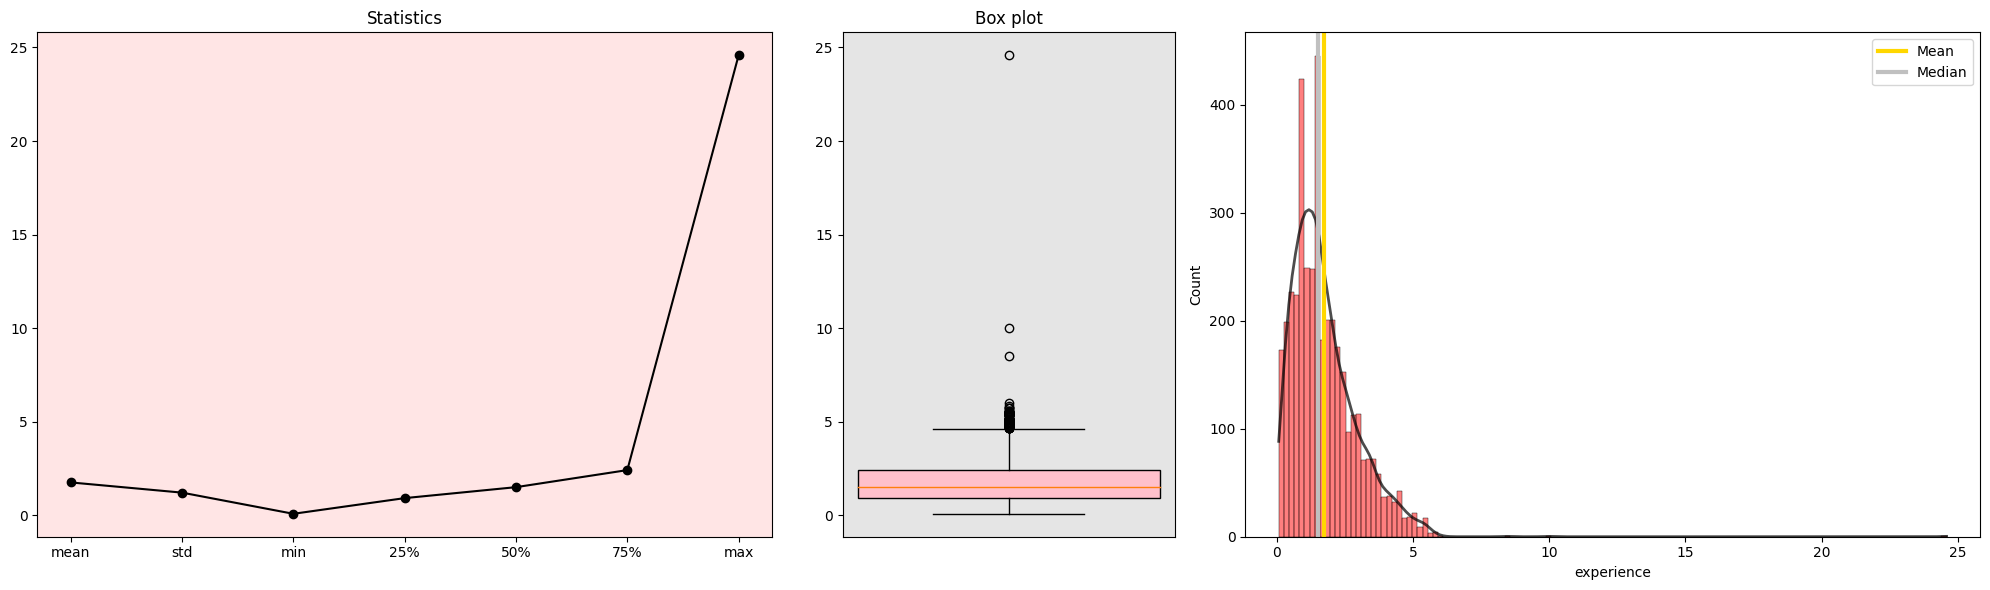

In [ ]:
cont_univariate_analysis(cln_df.experience)


**Observation:**

* Most of the respondents have below 5 years of experience.
* We could find outliers from the box plot above.


In [ ]:
no_out_df = no_out_df[no_out_df['experience'] < 7]

**Salary**

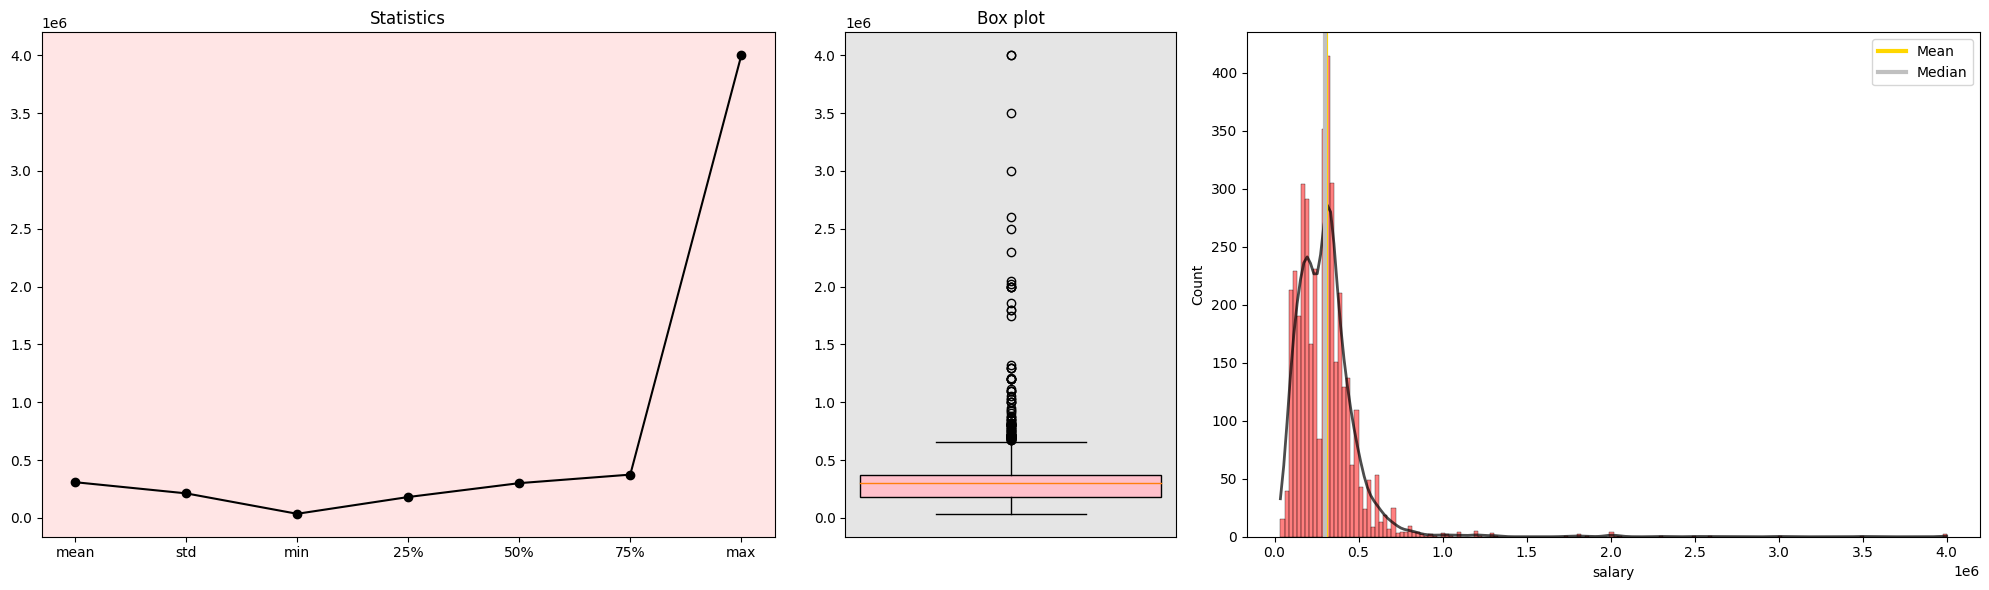

In [ ]:
cont_univariate_analysis(cln_df.salary)

**Observation:**

* 75% of respondents earns below 5 lakh pa.
* Outliers exist in the dataset for salary.

In [ ]:
no_out_df  =no_out_df[no_out_df['salary']<1500000]

**10percentage**

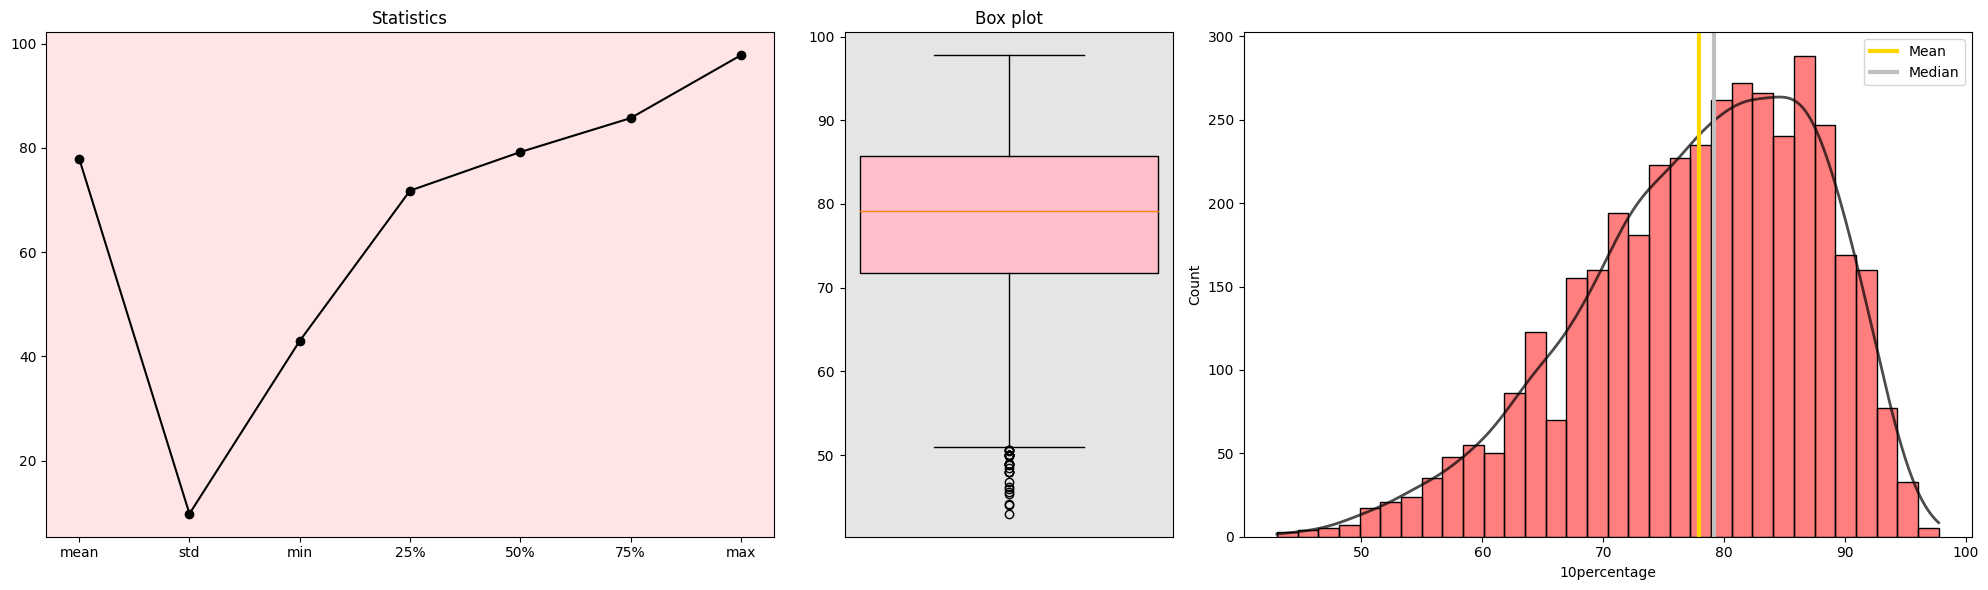

In [ ]:
cont_univariate_analysis(cln_df['10percentage'])

**Observation**

* Most respondents scored a 70-90 percentage in their 10th classes.
* Even the outlier exist, we are ignoring it as it is comparitively less

**12percentage**

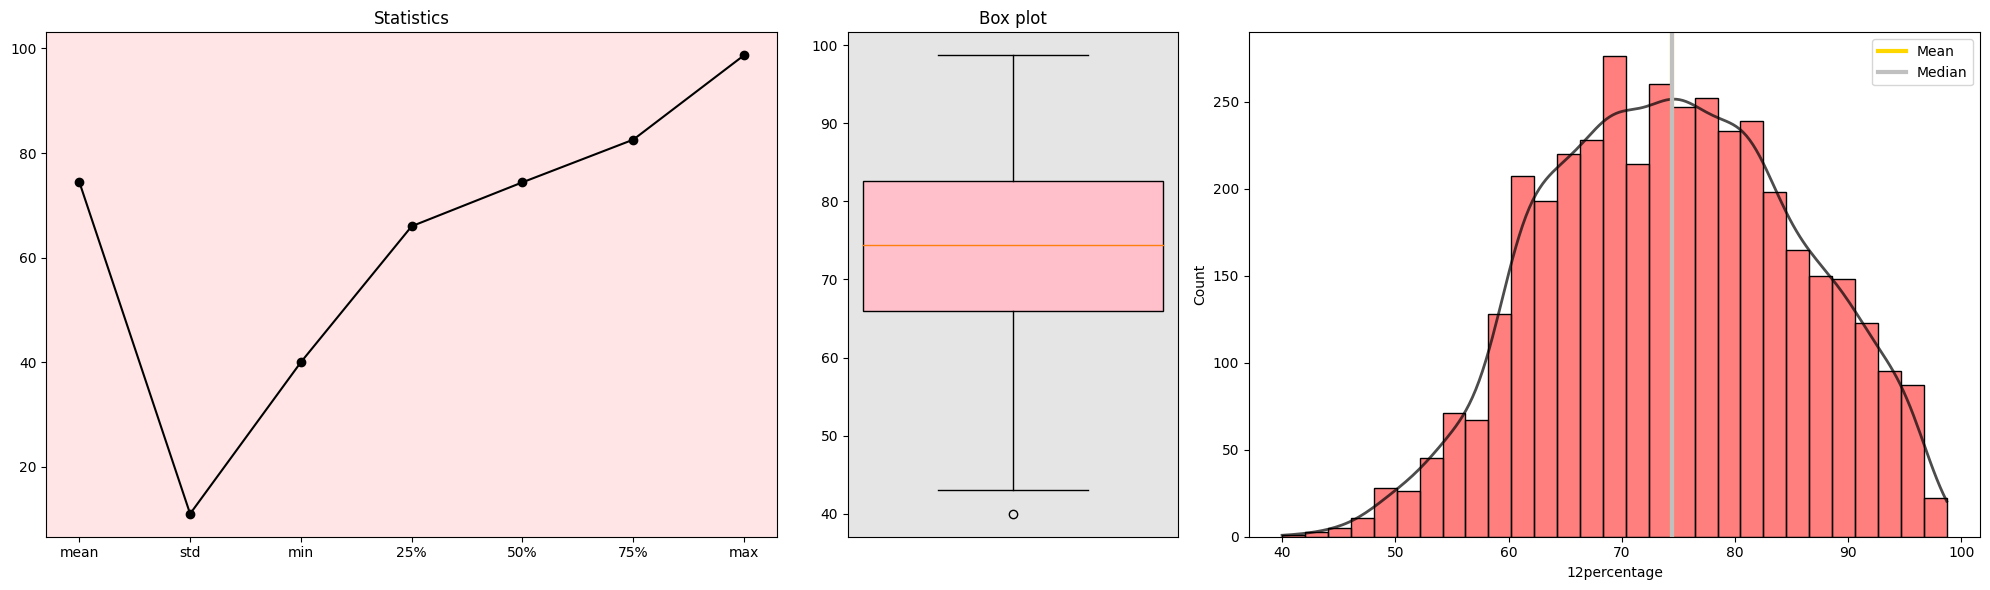

In [ ]:
cont_univariate_analysis(cln_df['12percentage'])

**Observtion**

* Most respondents scored 65% to 85% in their 12th classes
* one outlier exist in 12perecentage column

**College GPA**

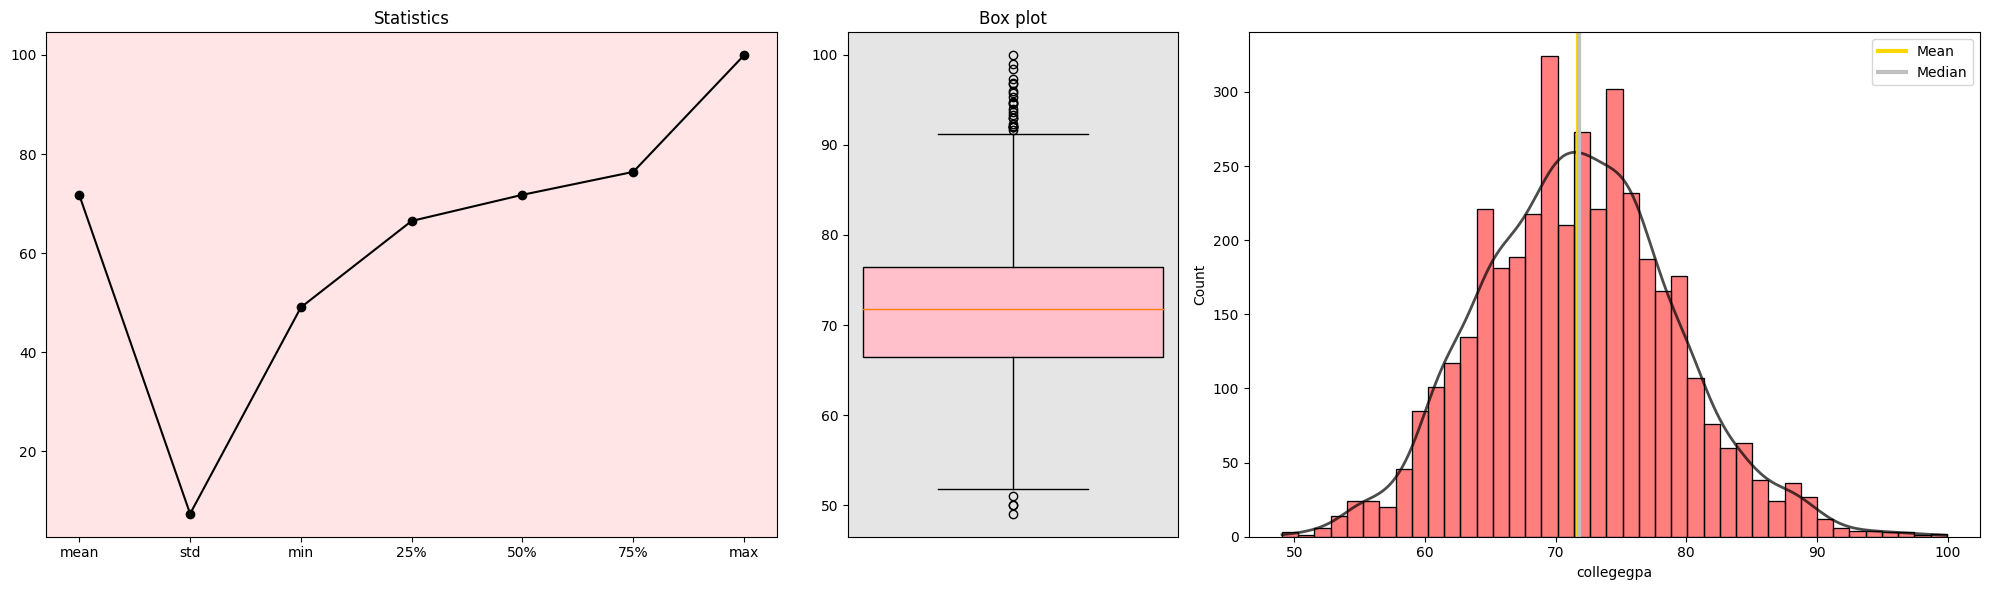

In [ ]:
cont_univariate_analysis(cln_df.collegegpa)

**Observation**

* Majority of respondents scored around 65%-75% in their college
* Outliers can be see from the box plot figured above.
* The data is deemed to be sufficiently normally distributed.

**English**

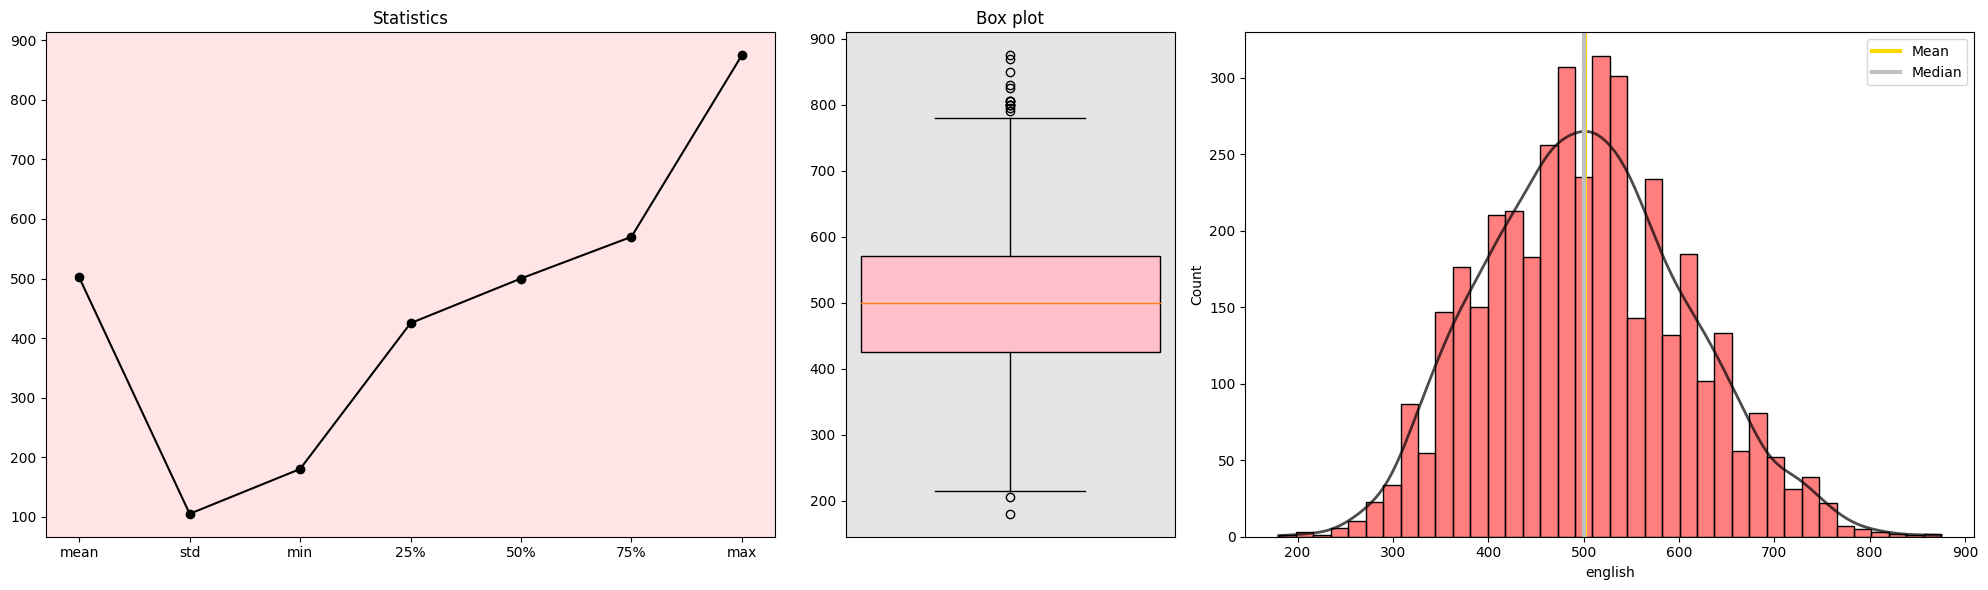

In [ ]:
cont_univariate_analysis(cln_df.english)

**Observation**

* 75% of the total respondents score 550 score in english test.
* The data is deemed to be sufficiently normally distributed.

**Logical**



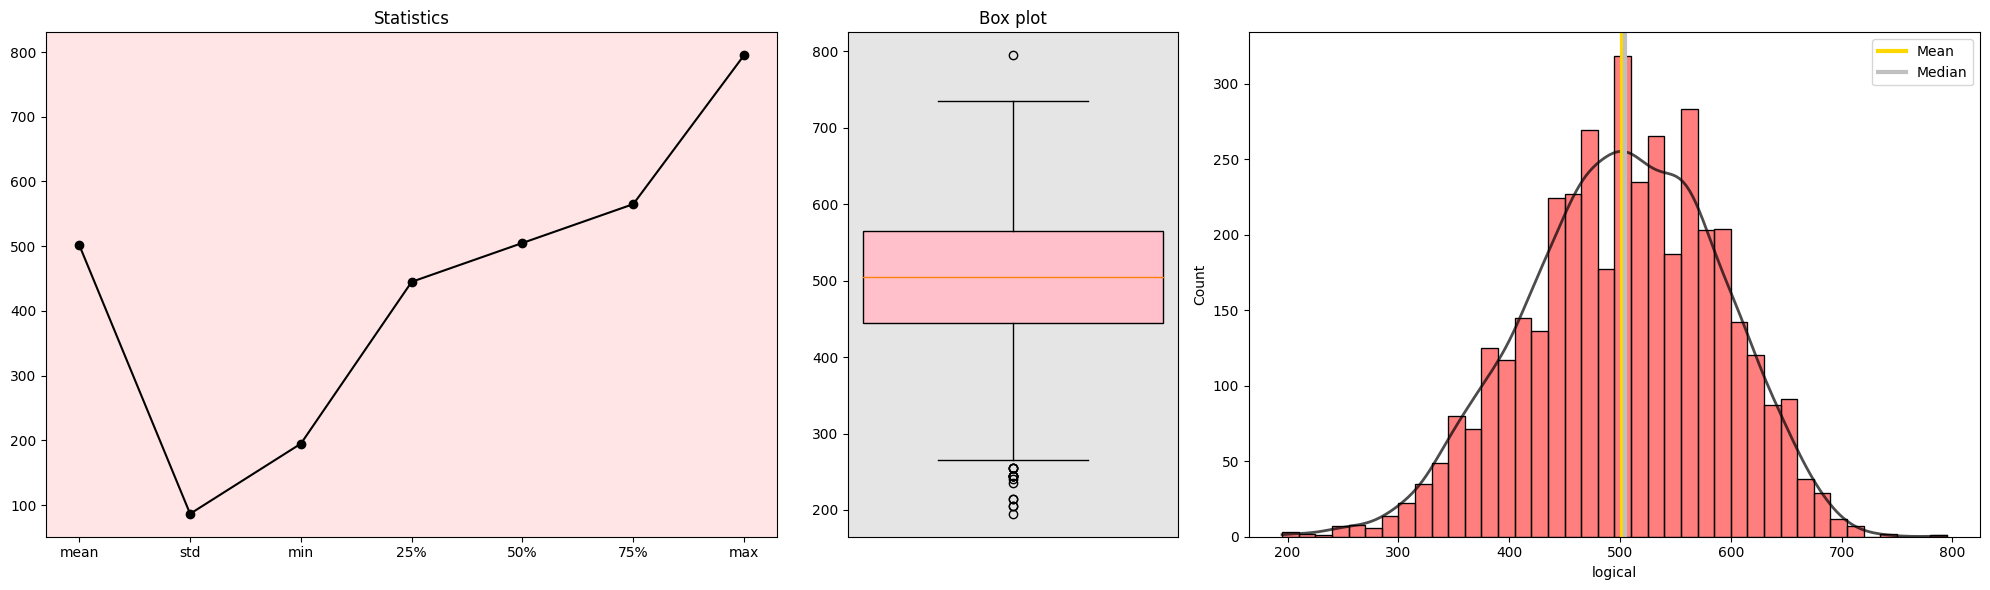

In [ ]:
cont_univariate_analysis(cln_df.logical)

**Observation**

* 25% - 75% respondents scored 450 to 550 in their logical test.
* The data is seems to be approximately normally distributed.

**Quantitative section**

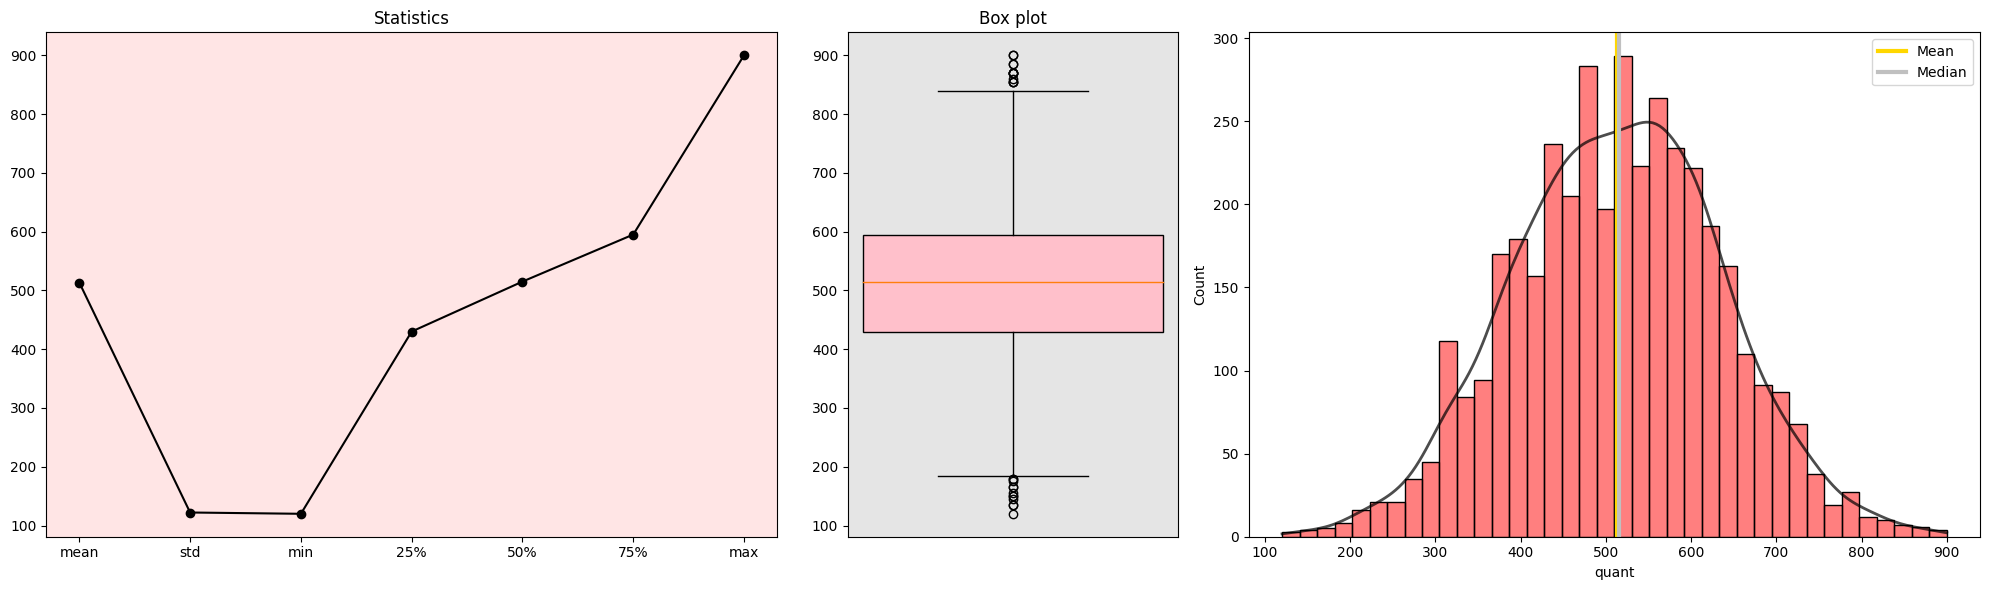

In [ ]:
cont_univariate_analysis(cln_df.quant)

**Observation**

* 25% of respondents minimum scored 420 and 75% of them scored 570 in their Quantitative test.

* The data is nearly normally distributed.

**Domain**

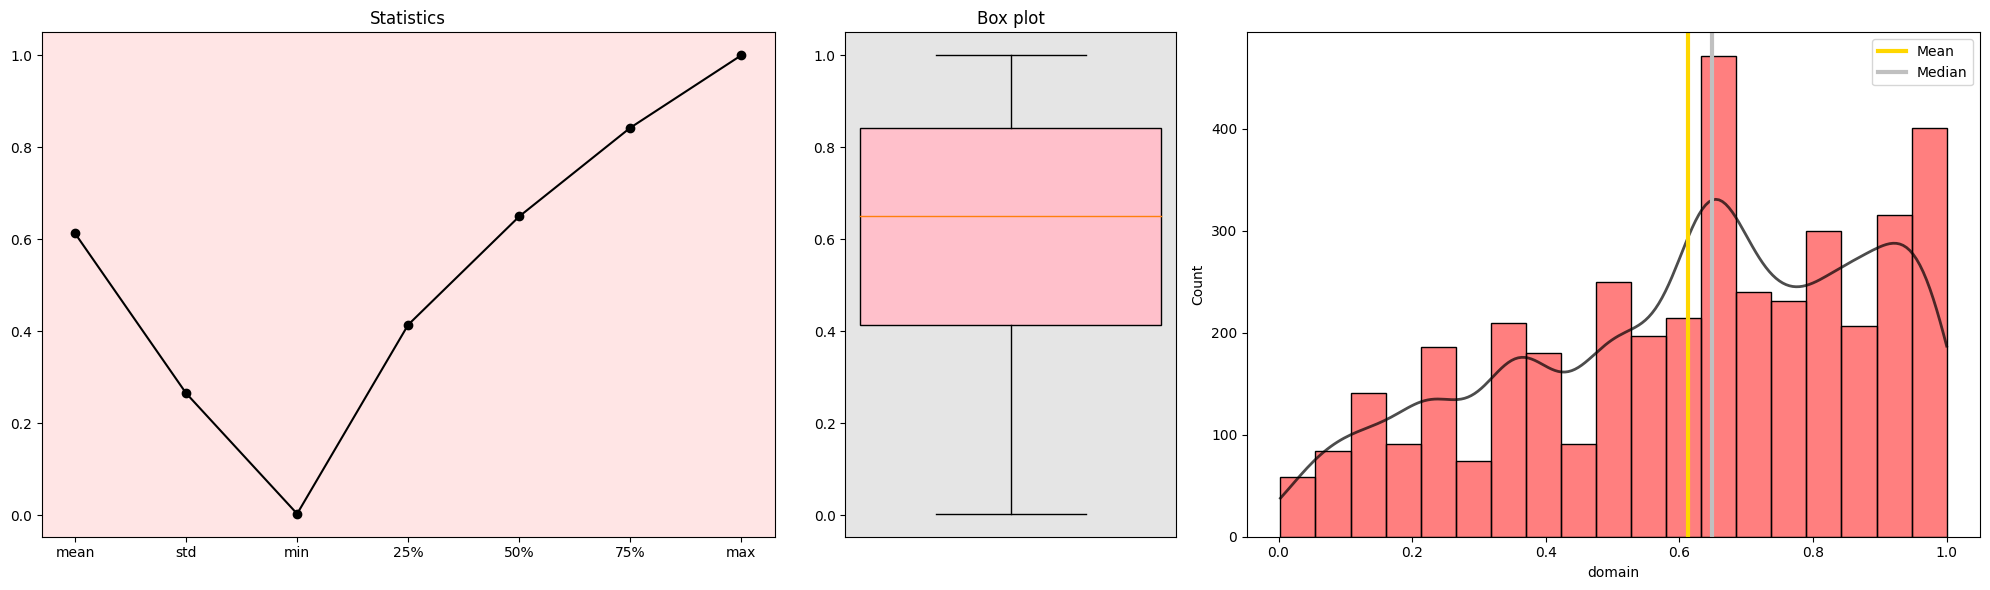

In [ ]:
cont_univariate_analysis(cln_df.domain)


**Observation**
* Most respondents scored a score between 0.4 to 0.8 in domain level test


**Computerprogramming**

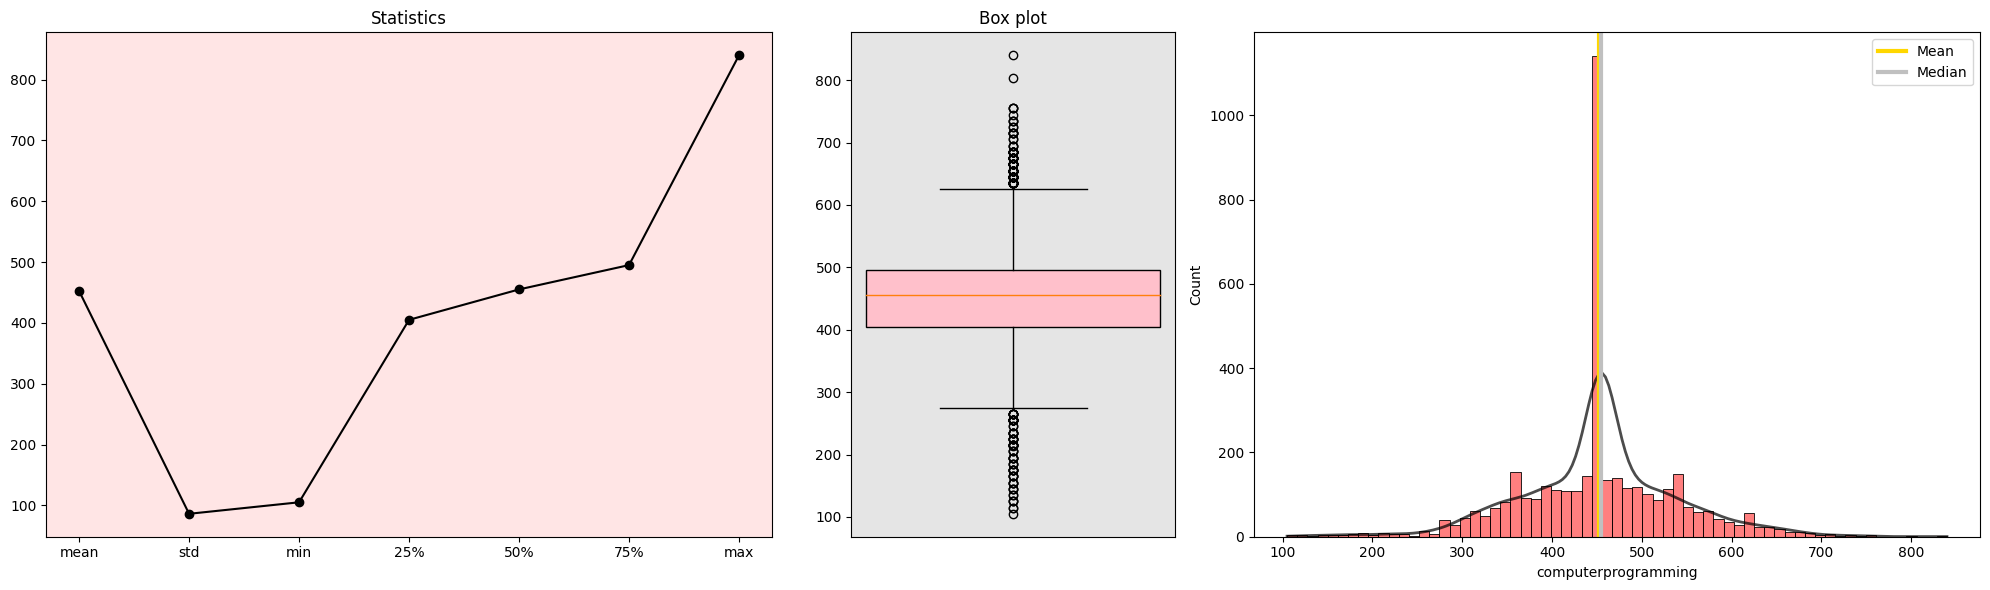

In [ ]:
cont_univariate_analysis(cln_df.computerprogramming)


** Observation**

* We could observe low and high extreme outliers in the data
* 75% of respondents scored 470 or below in the computer programming tests

**Electronicsandsemicon**

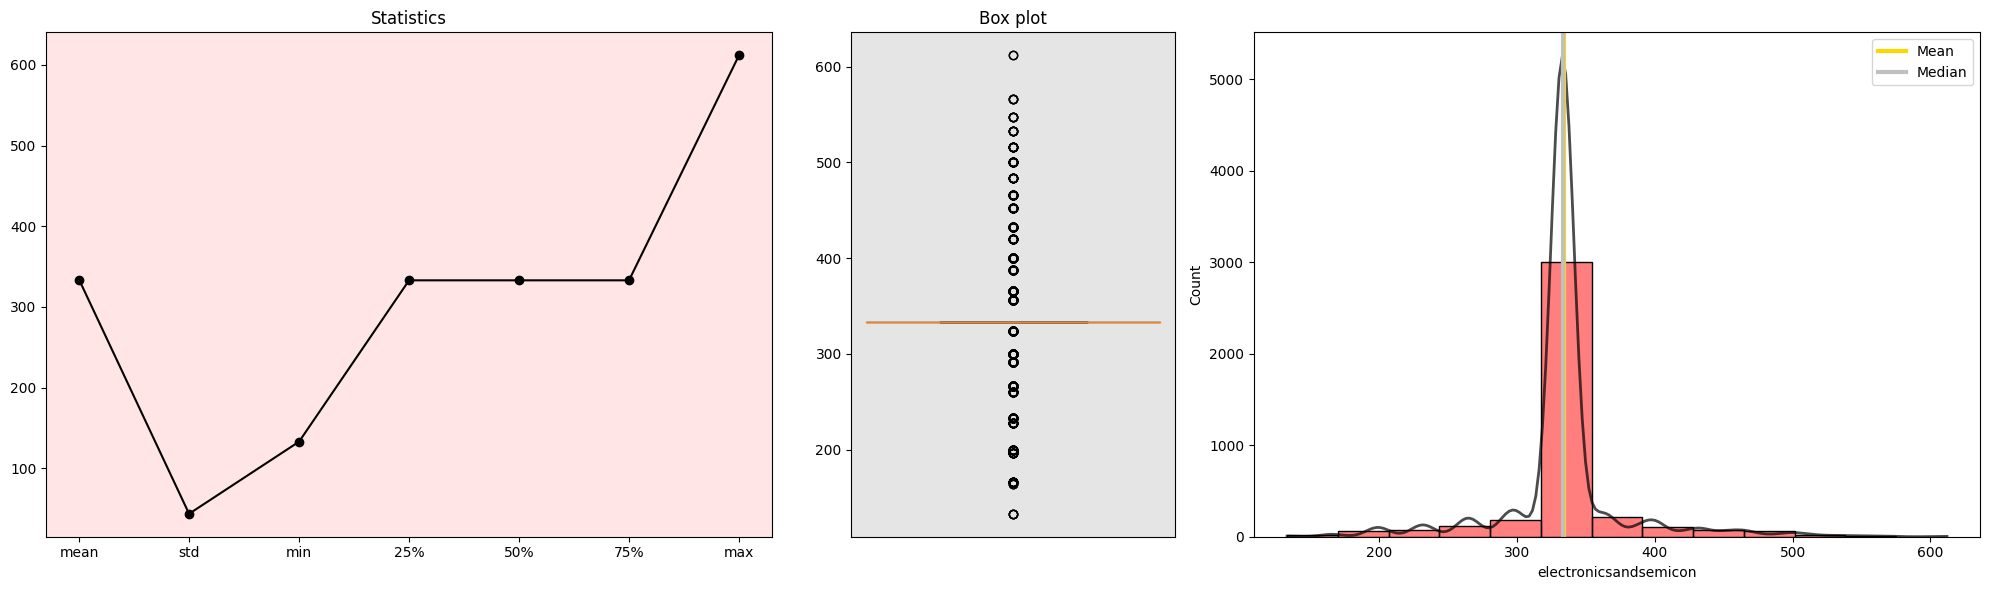

In [ ]:
cont_univariate_analysis(cln_df.electronicsandsemicon)


**Observation**
* Most respondents scored nearly 340 in their electronic and semi conductors test
* very much extreme low and high outliers are observed


**Computerscience**

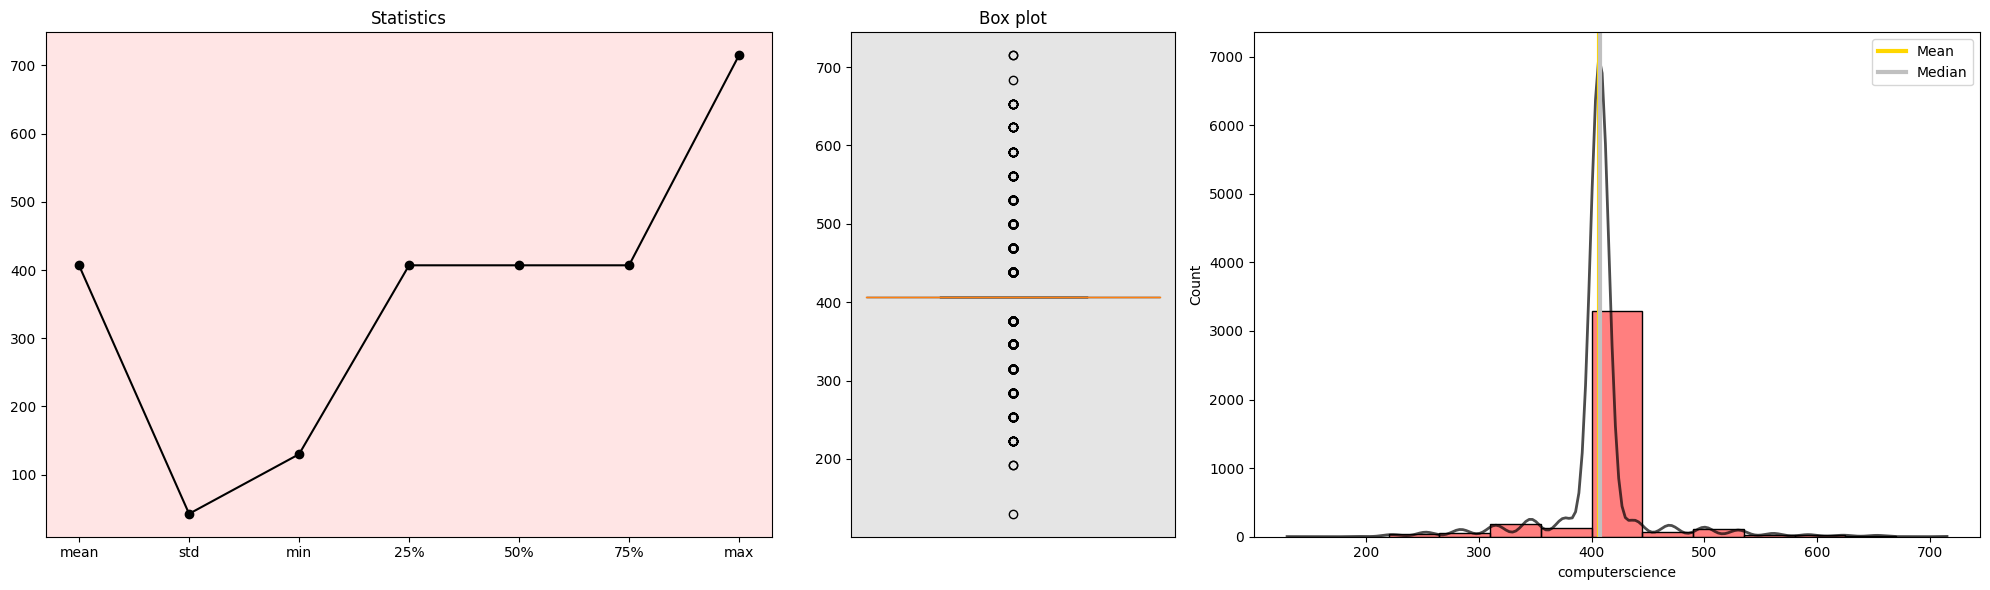

In [ ]:
cont_univariate_analysis(cln_df.computerscience)

**Observation**

* As per graphs we could observe majority scored a constant score of approx. 400 in computerscience test
* extreme outliers are observed in the data

**conscientiousness**

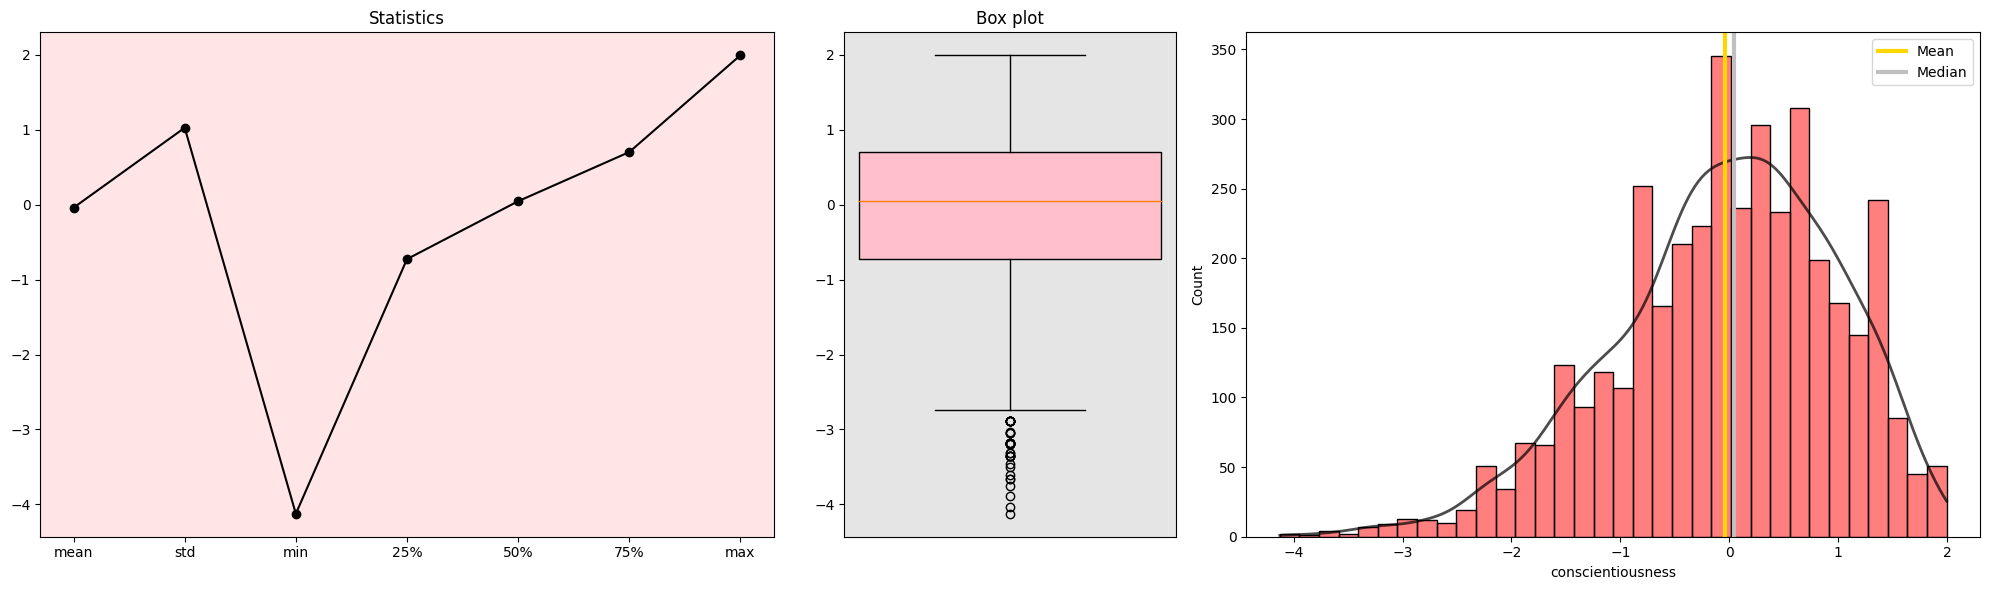

In [ ]:
cont_univariate_analysis(cln_df.conscientiousness)


**Observation**
* The data distribution is left skewed
* The maximum respondents scored between -0.8 to 0.8 in conscientiousness
* lower extreme outliers are observed


**Agreeableness**

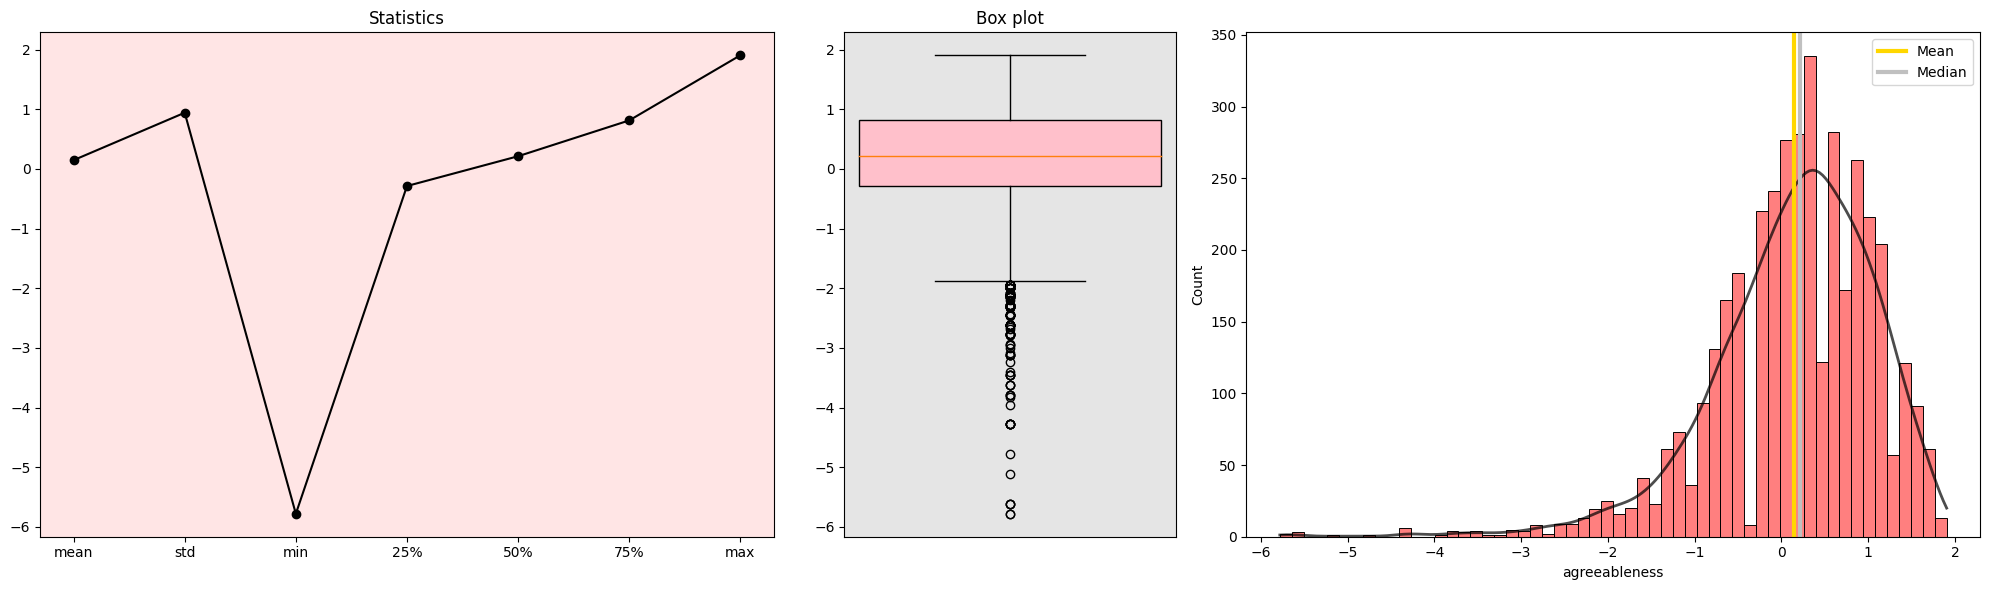

In [ ]:
cont_univariate_analysis(cln_df.agreeableness)


**Observaion**

* The distribution of data can be discribed as left skewed.
* around 25% of repondents scored negative in agreeableness test
* outliers are found in lower extremes

**Extraversion**

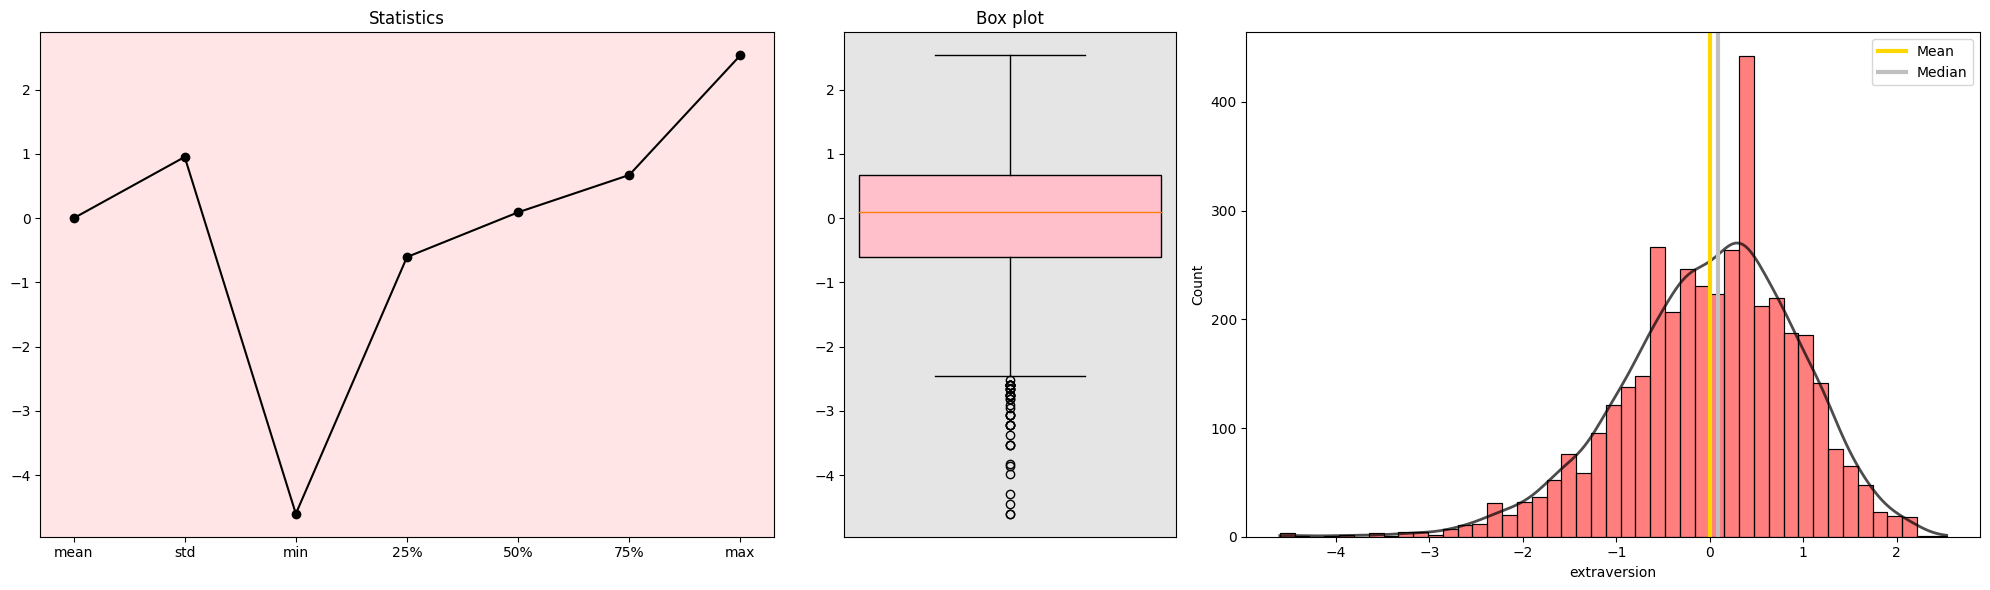

In [ ]:
cont_univariate_analysis(cln_df.extraversion)

**Observation**
* The dataset is nearly left skewed in distribution.
* 50 percentage of students score less than 0 in extraversion test

**Nueroticsm**

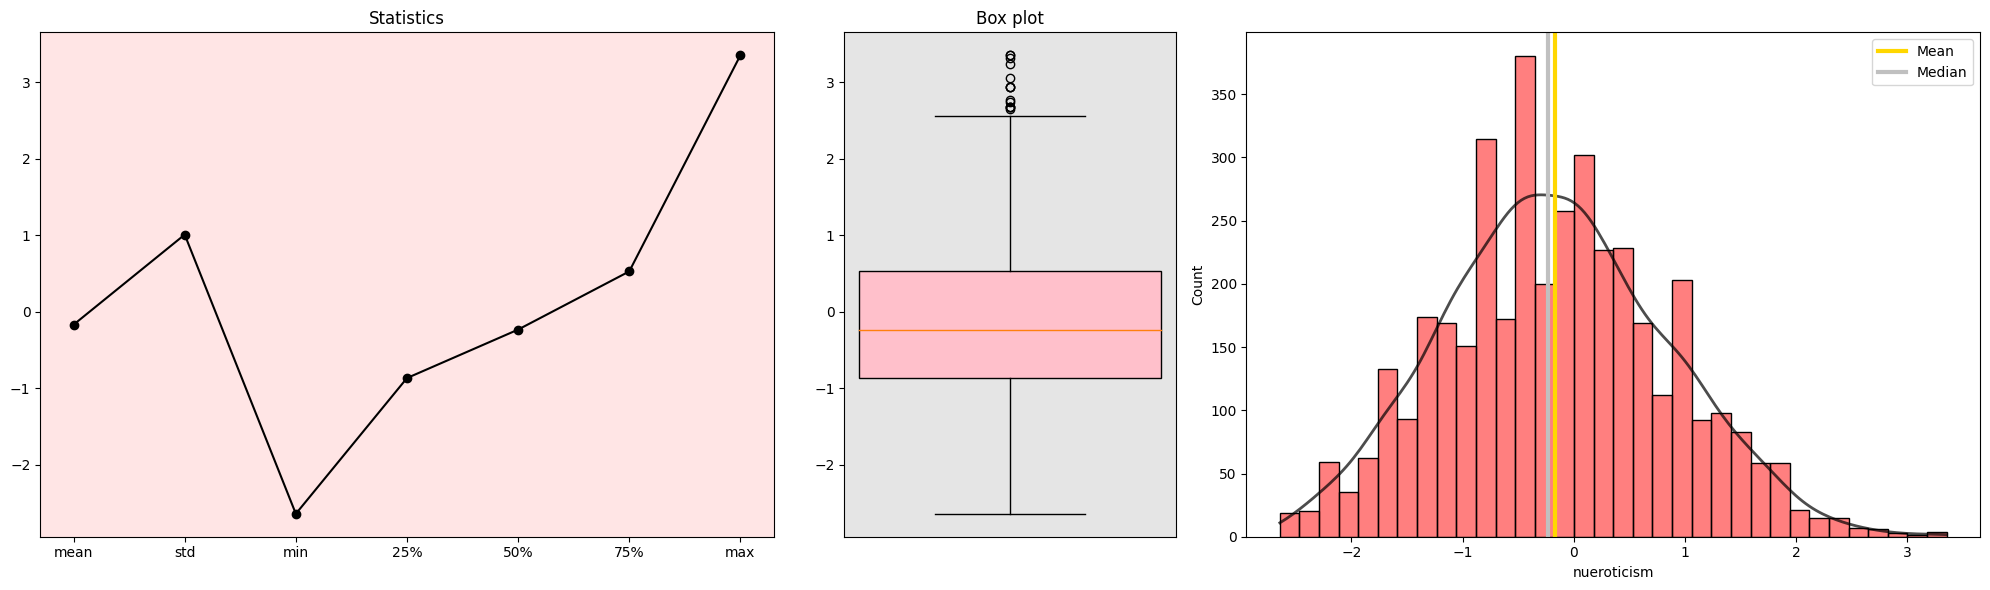

In [ ]:
cont_univariate_analysis(cln_df.nueroticism)

**Observation**

* Approximatly 65% respondents scored below 0 in their neurotism test
* Data is nearly right skew distributed

**Age**

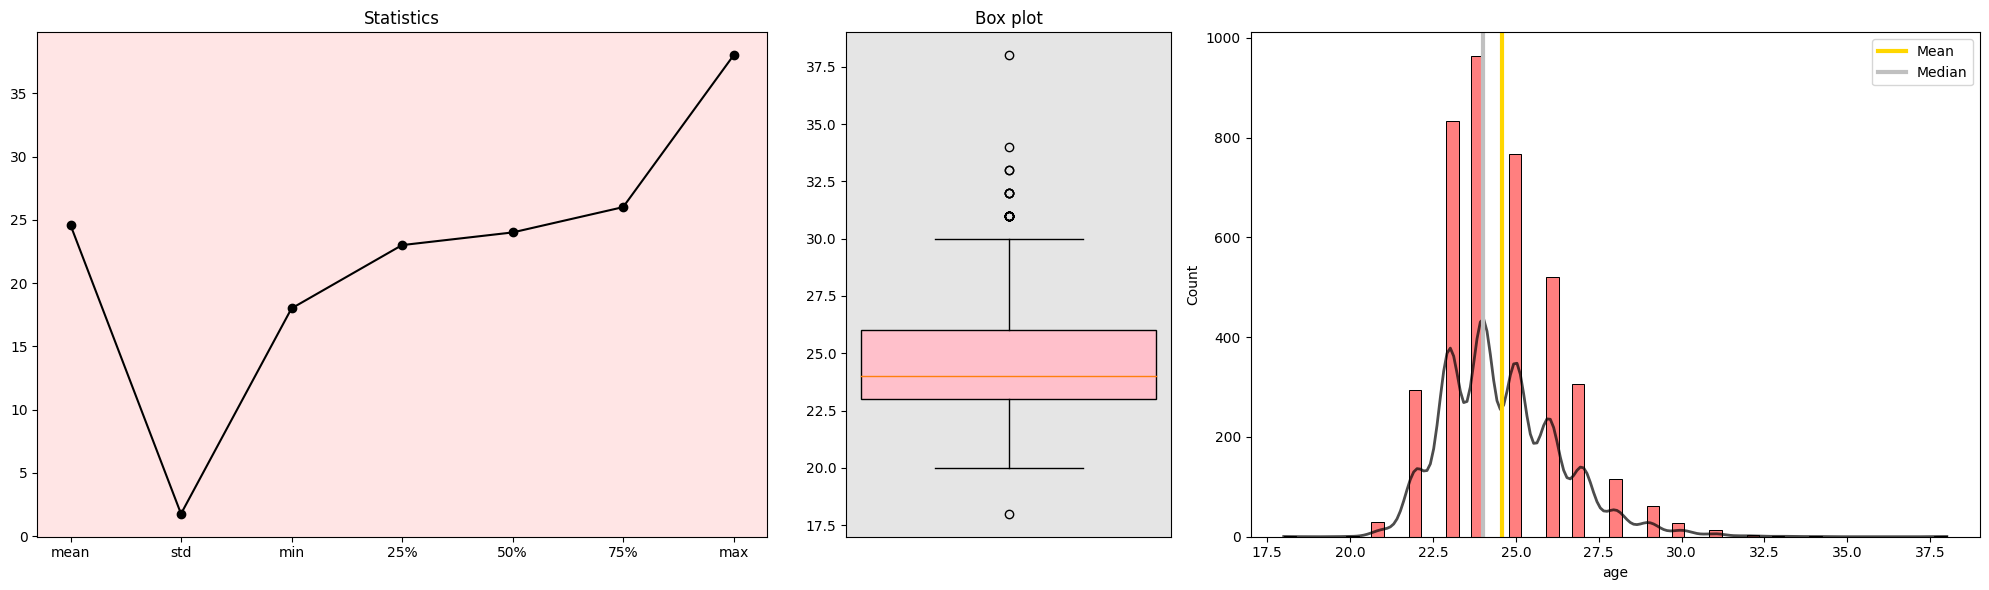

In [ ]:
cont_univariate_analysis(cln_df.age)

**Observation**
* We have low and high extreme outliers observed in the data
* Most respondents lie between an age of 23 to 26 years


In [ ]:
no_out_df = no_out_df[(no_out_df['age'] > 20) & (no_out_df['age'] < 32)]

# Catergorical


In [ ]:
def viz_cat_uni_analysis(column , top = -1 , dis_top_per = False , need_pie = True):


  if dis_top_per and top != -1 :
    fig, ax = plt.subplot_mosaic([[0,0,0,0],[1,1,2,2]], figsize=(18,8))

    sumoftop = cln_df[column].value_counts()[:top].sum()/cln_df[column].count()*100

    df = pd.DataFrame(
      [{
          'Partition': f'Top {top}',
          '% each in total' : sumoftop
      },
      {
          'Partition': 'others',
          '% each in total': 100-sumoftop
      }]
    )

    pach2 = sns.barplot(data = df , x = 'Partition' , y ='% each in total' , color = (1,0,0), alpha =.7 , width=.80, gap=.05 , ax = ax[2])
    pach2.bar_label(pach2.containers[0])
  else:
    fig, ax = plt.subplot_mosaic([[0,1]], figsize=(20,4))

  if top != -1:
    temp_table = cln_df[column].value_counts()[:top].reset_index()
  else:
    temp_table = cln_df[column].value_counts().reset_index()
    top = len(cln_df[column].unique())

  temp_table.columns = [column, 'count']


  pach = sns.barplot(data = temp_table , y = column , x ='count' , color = (1,0,0), alpha =.7 , width=.80, gap=.05 , ax = ax[0])
  pach.bar_label(pach.containers[0])



  ax[1].pie(data = temp_table , labels = temp_table[column],  x = 'count' , colors=[(.7,0,0,i) for i in np.linspace(1,0,top)], autopct=lambda x : f'{round(x)}%' , textprops = {'size':15 , 'color':'black'},
            wedgeprops = dict(linewidth=1, edgecolor=(1,0,0,0.1)))

  ax[1].set_title(f'% of each among top {top}')




  plt.tight_layout()
  plt.show()

**Degree**

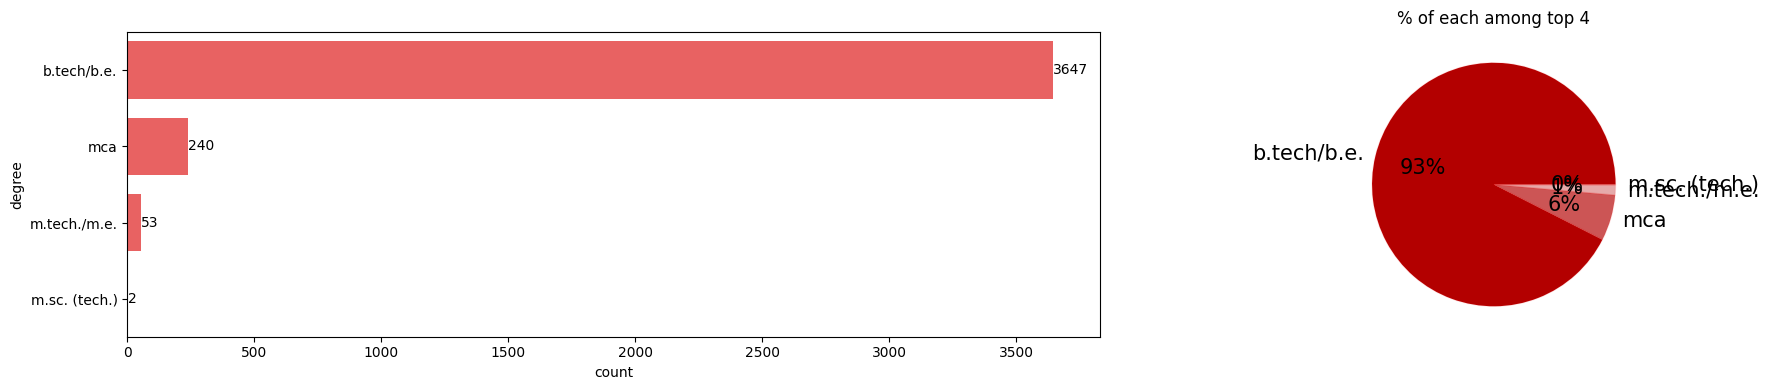

In [ ]:
viz_cat_uni_analysis('degree')


**Observation**

* 93% of respondents are b.tech/b.e graduates

**Designation**

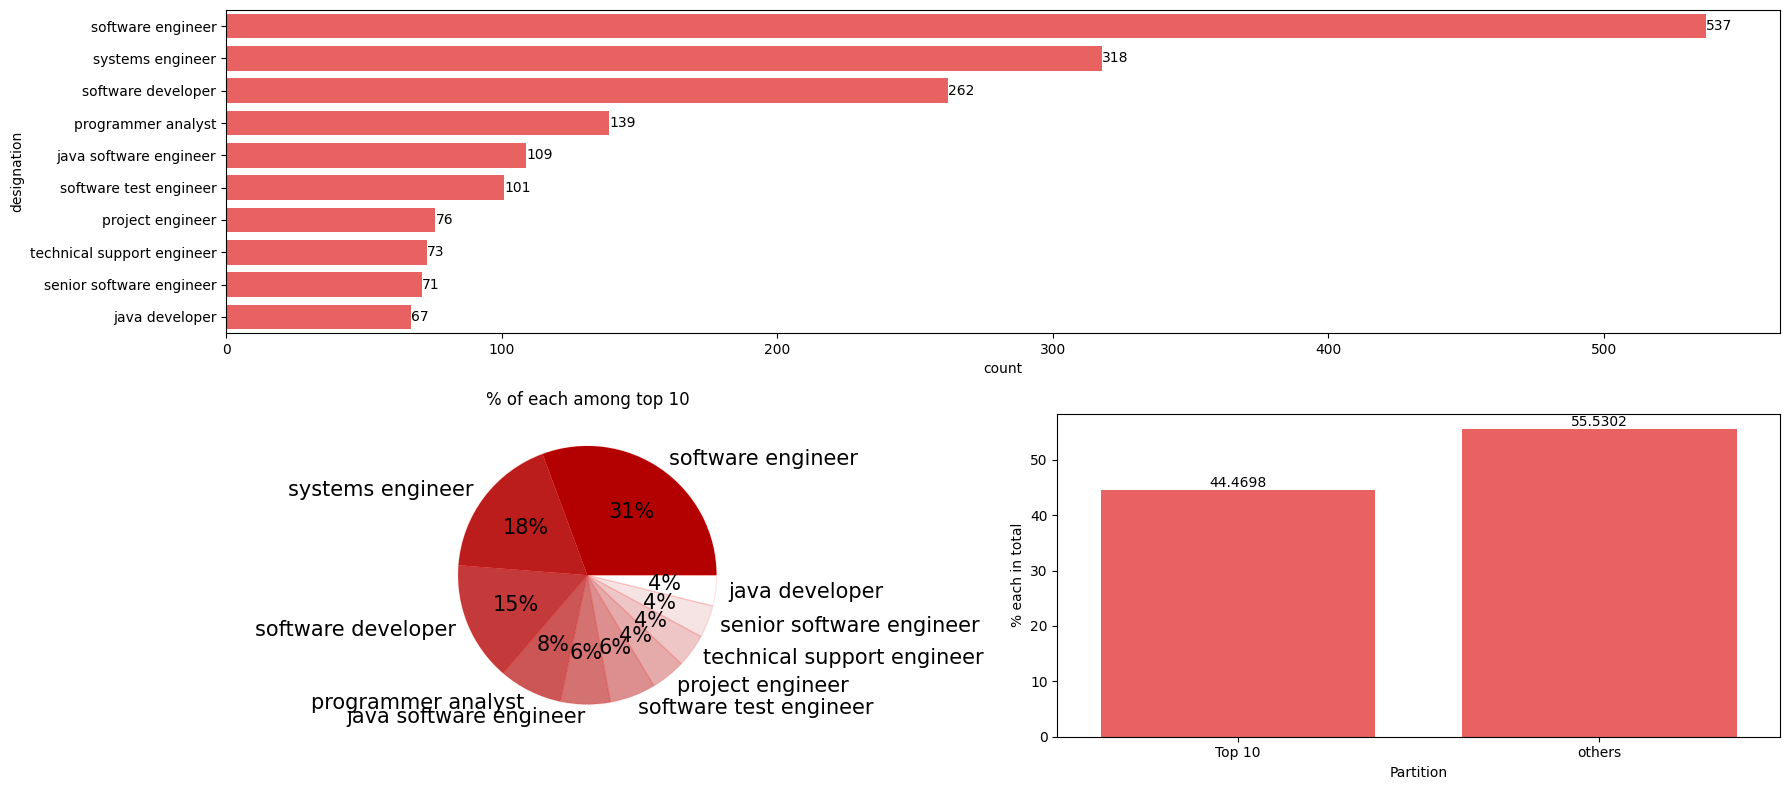

In [ ]:

viz_cat_uni_analysis('designation',10,True)


**Observation**

* 31% among top ten designation is software engineers and 18% of system engineers.

* Top 10 designation consist of 44.4% of total data.


**JobCity**

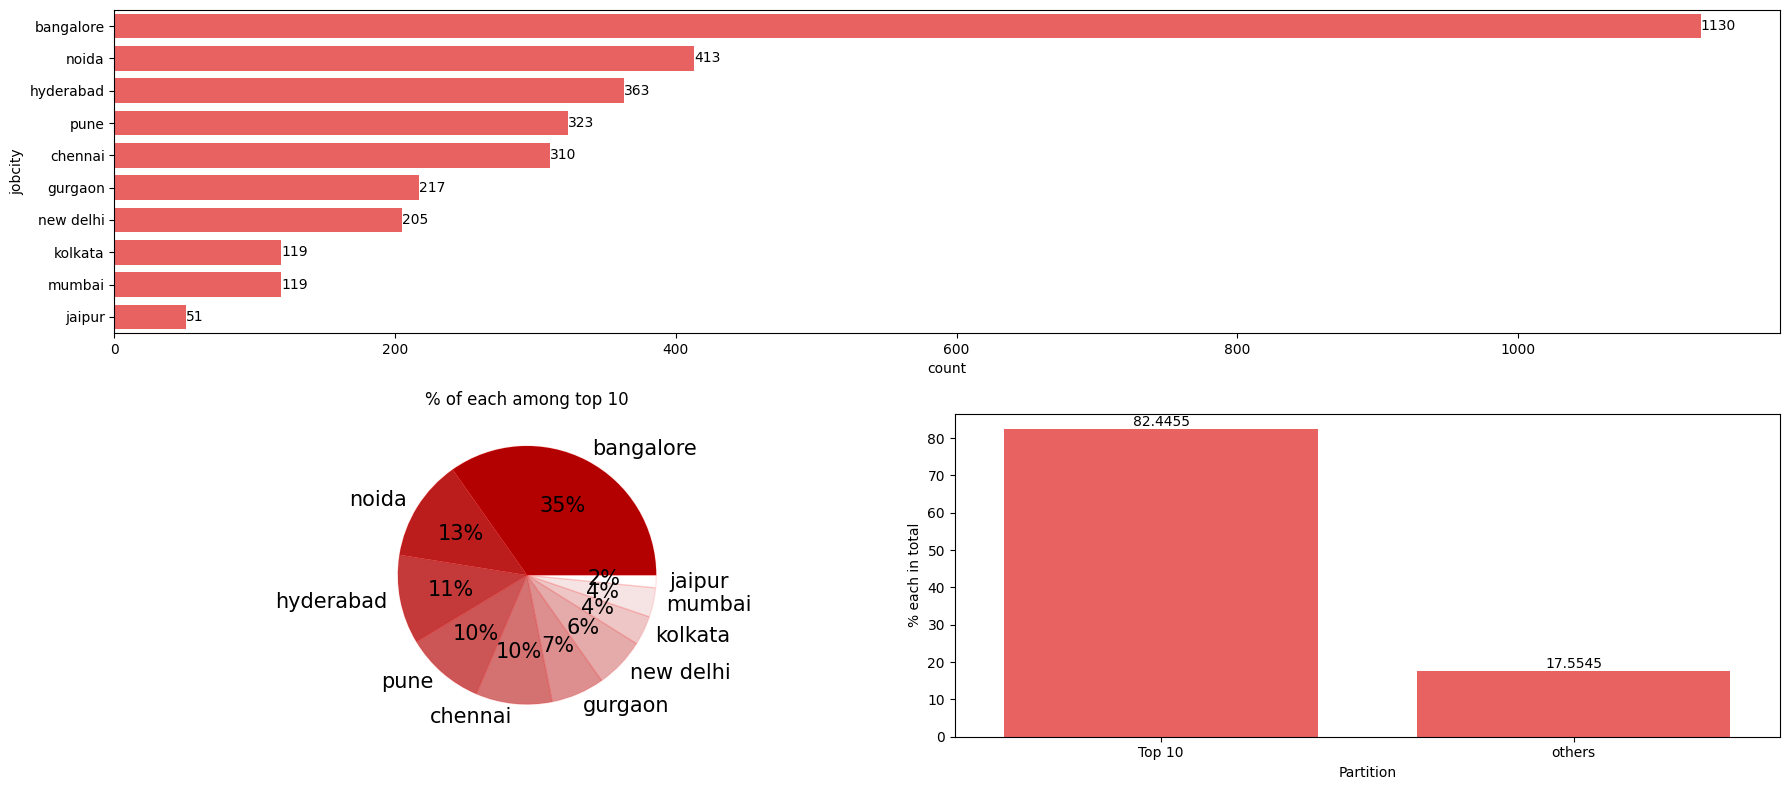

In [ ]:

viz_cat_uni_analysis('jobcity',10,True)


**Observation**
* Most respondents prefer to or working in banglore city followed by noida
* 82.4 percent of repondents work in either of any top shown cities.

**Gender**

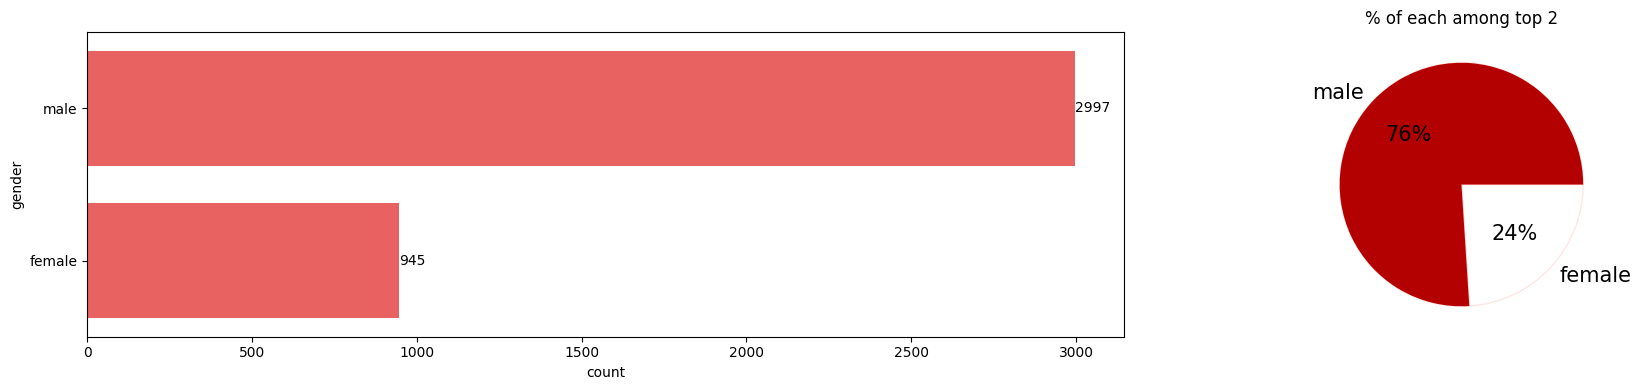

In [ ]:
viz_cat_uni_analysis('gender')


**Observation:**

* The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one.
* 76% of respondents are male and 24% female.

**10th board**

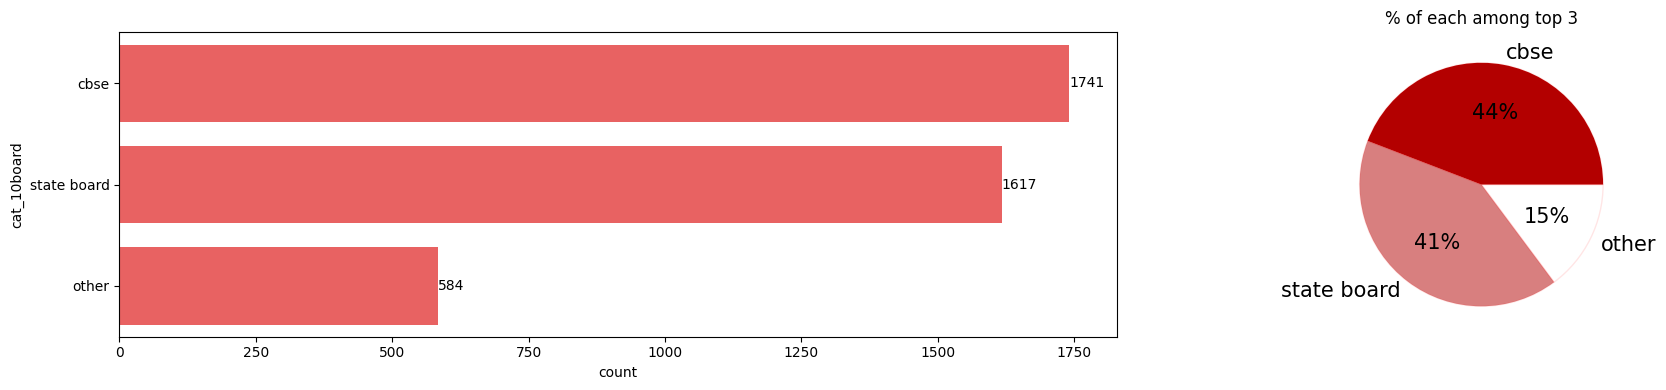

In [ ]:
viz_cat_uni_analysis('cat_10board')


**Observation**

* Majority of respondents are studied in CBSE board. which around 1741 respondents.
* state boards are then followed after CBSE board

**12 th Board**

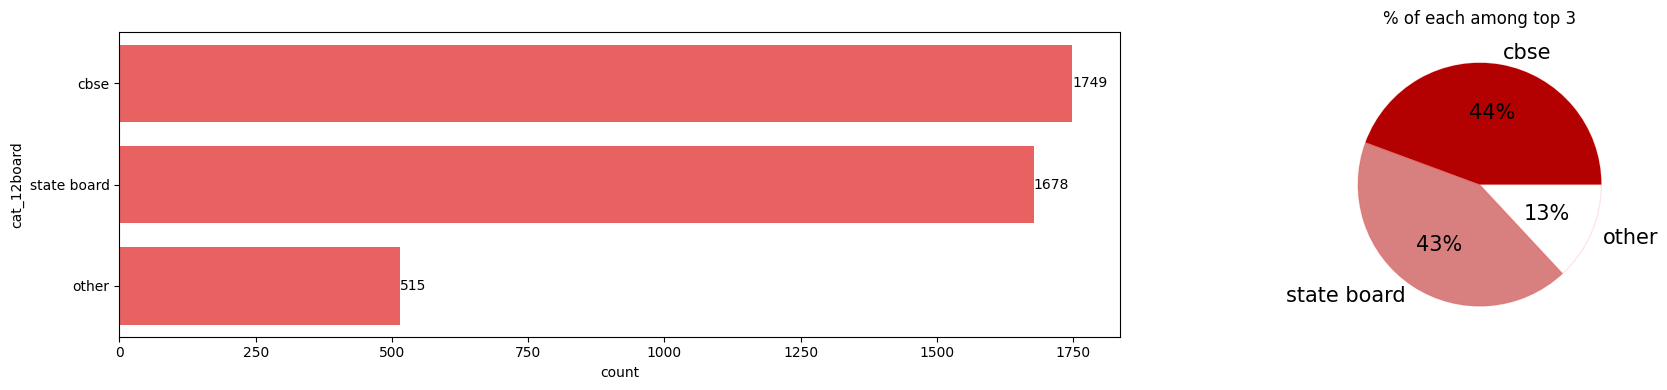

In [ ]:
viz_cat_uni_analysis('cat_12board')


**Observation:**

* Majority of respondents are studied in CBSE board. which around 1749 respondents.
* state board is then followed after CBSE board

**College tier**

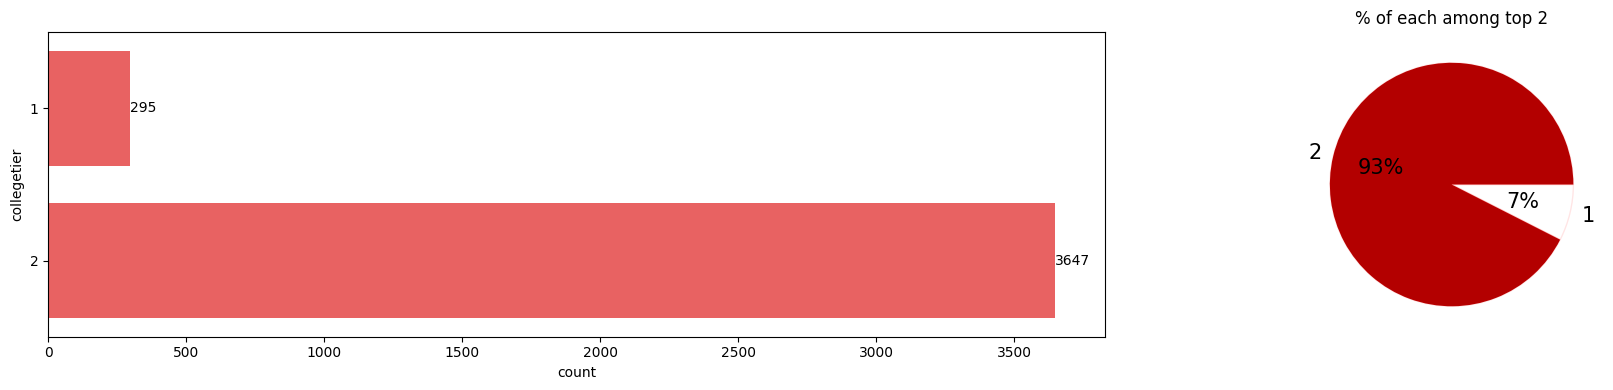

In [ ]:
viz_cat_uni_analysis('collegetier')


**Observation:**

* 93% of respondents comes from a 2 tier college


**Specialization**

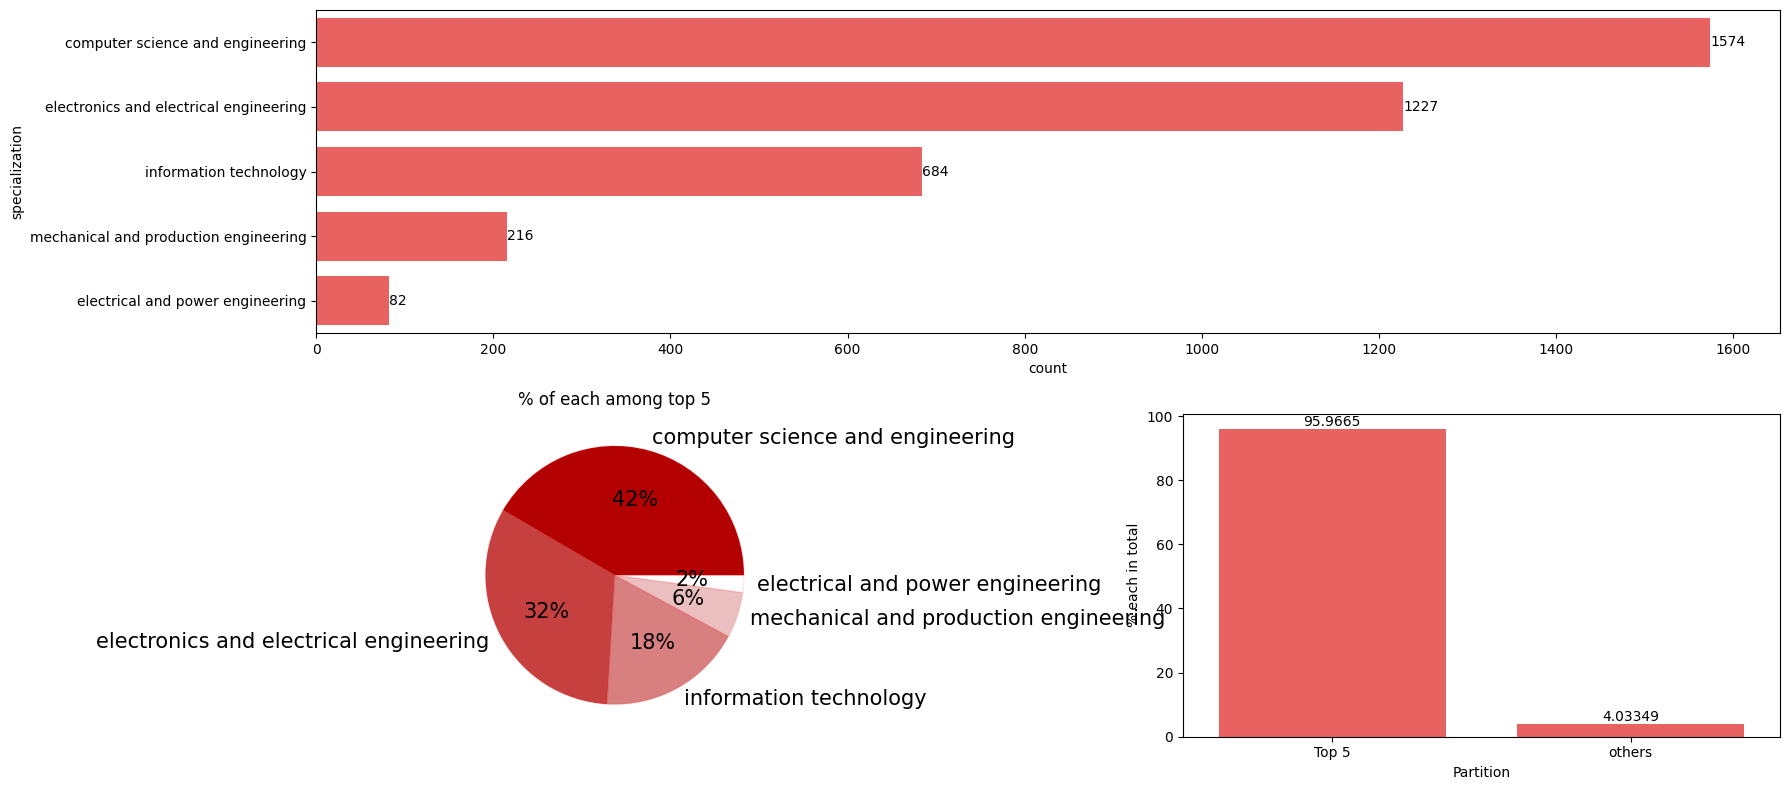

In [ ]:
viz_cat_uni_analysis('specialization', 5 ,True )


**Observation:**

* Computer science and engineering, electonics and electical engineering , information engineering, mechanical and production engineering and electrical power engineering are the top 5 specialization.

* Top 5 specialization consist of 95 % of total data

* The major scpecialization is computer science and engineering

**College State**

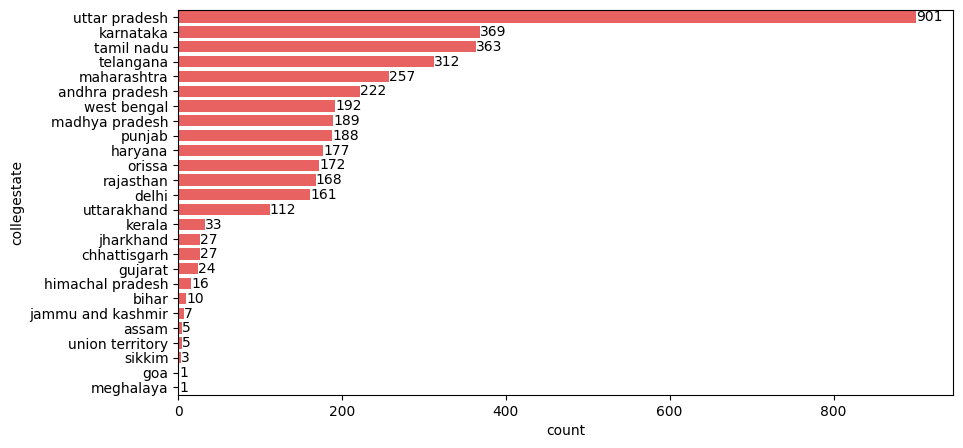

In [ ]:
column = 'collegestate'
temp_table = cln_df[column].value_counts().reset_index()
temp_table.columns = [column, 'count']

fig , ax = plt.subplots(figsize=(10,5))

pach = sns.barplot(data = temp_table , y = column , x ='count' , color = (1,0,0), alpha =.7 , width=.80, gap=.05 , ax = ax)
pach.bar_label(pach.containers[0])

plt.show()

**Observation**

* Majority of respondents did their college in Utter pradesh
* followed by karnataka


# Bivariate Analysis
**Relation between Salary and continues variables**

**With outliers:**

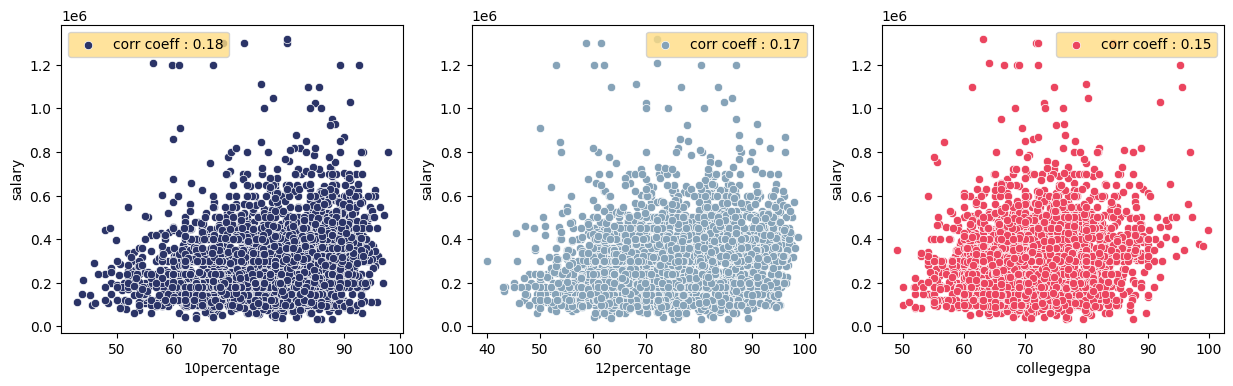

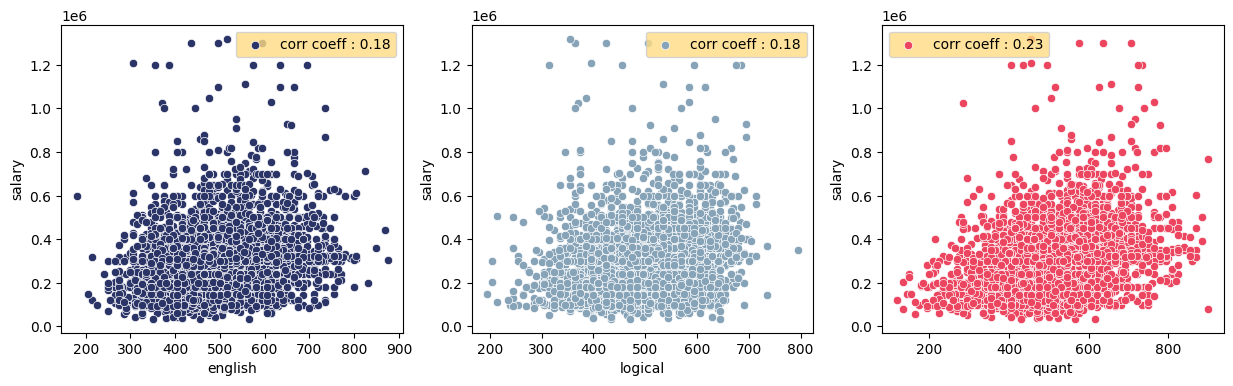

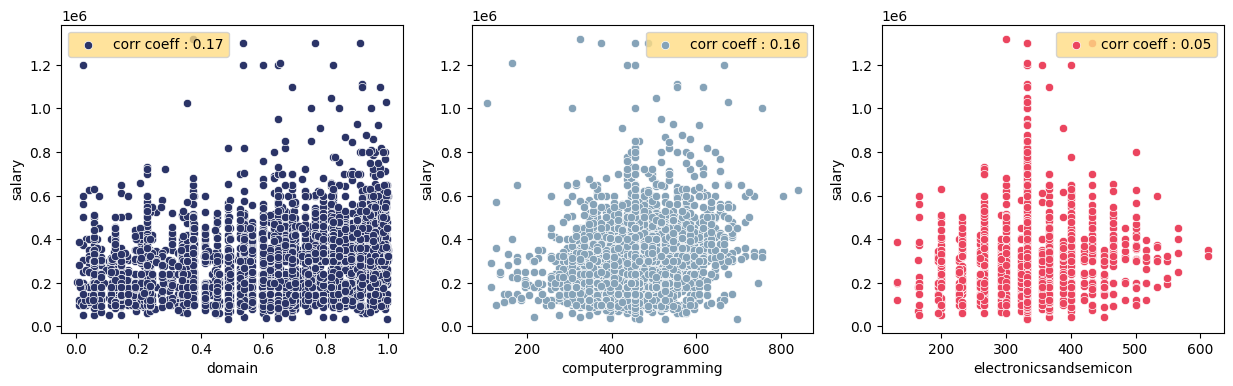

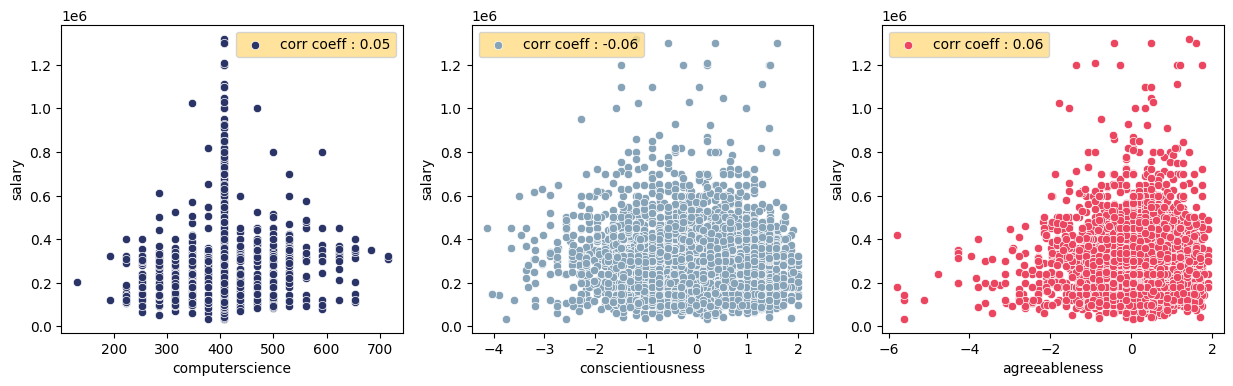

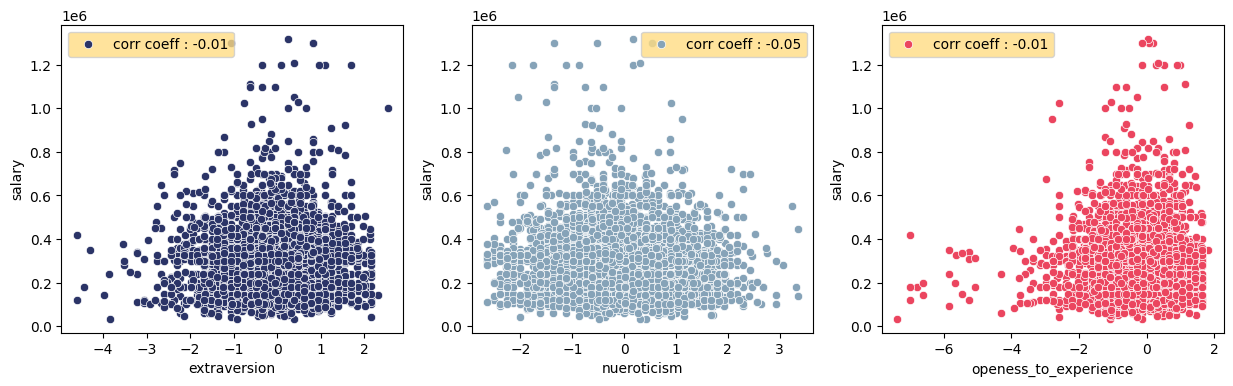

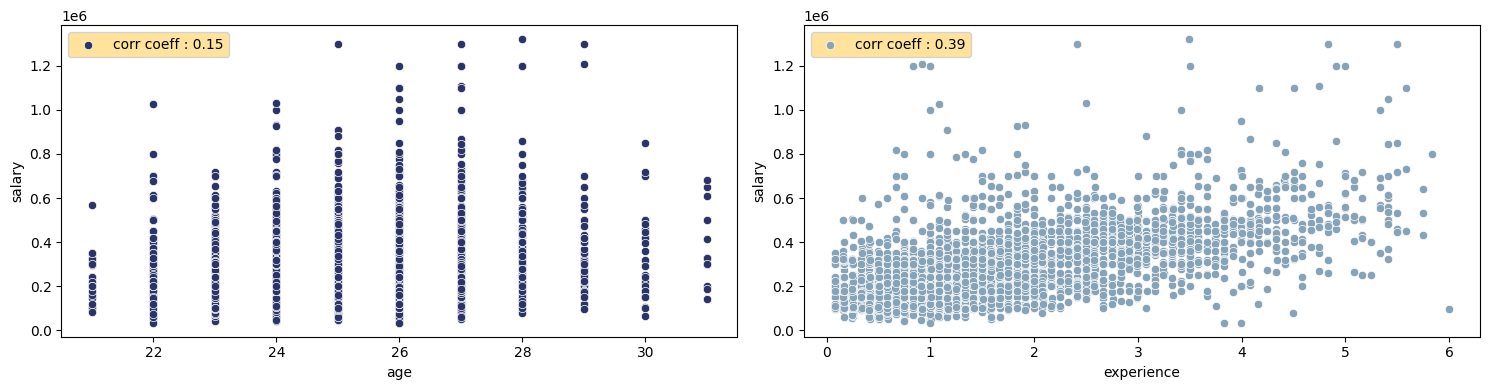

In [ ]:
columns = [['10percentage', '12percentage', 'collegegpa'],
['english', 'logical', 'quant'],
['domain','computerprogramming', 'electronicsandsemicon'],
['computerscience','conscientiousness', 'agreeableness'],
['extraversion', 'nueroticism','openess_to_experience'],
['age', 'experience'] ]

color = { 0:'#2B3467', 1: '#86A3B8',  2: '#EB455F'}
for arr in columns:
  fig , ax = plt.subplots(1,len(arr) ,figsize = (15,4))
  for i,col in enumerate(arr):
    corr = np.round(np.corrcoef(cln_df["salary"], cln_df[col])[0,1],2)
    sns.scatterplot(data=no_out_df, x=col , y = 'salary' , label = f'corr coeff : {corr}' , ax=ax[i] , color = color[i])
    ax[i].legend(facecolor='#FFDD83')

    # print(np.round(np.corrcoef(no_out_df['salary'], no_out_df[col])[0,1],2))


plt.tight_layout()
plt.show()

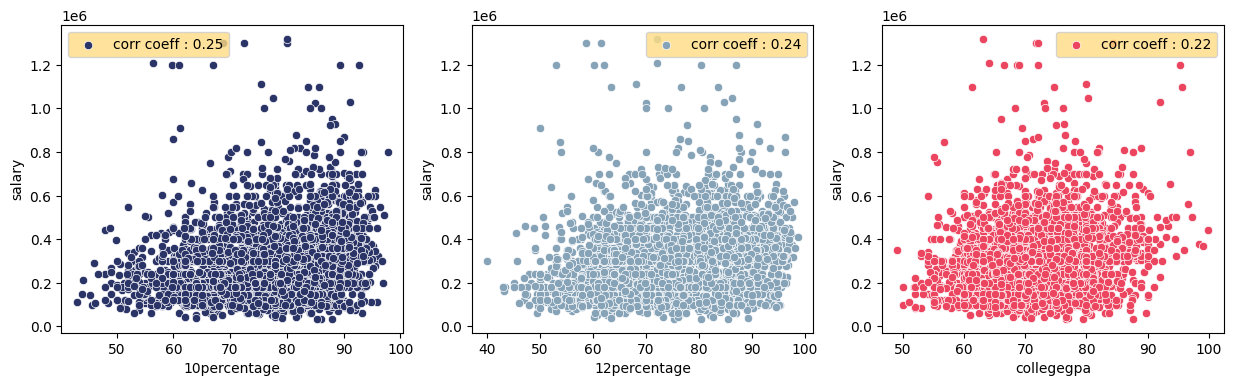

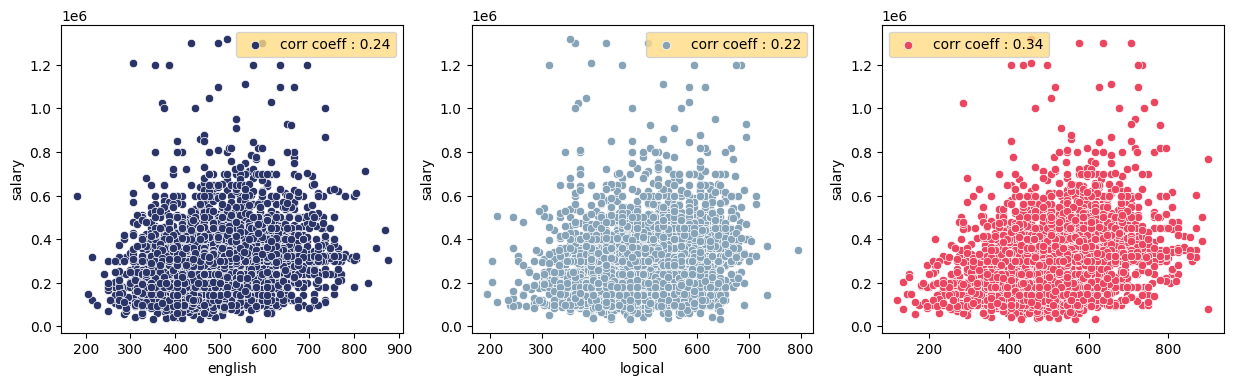

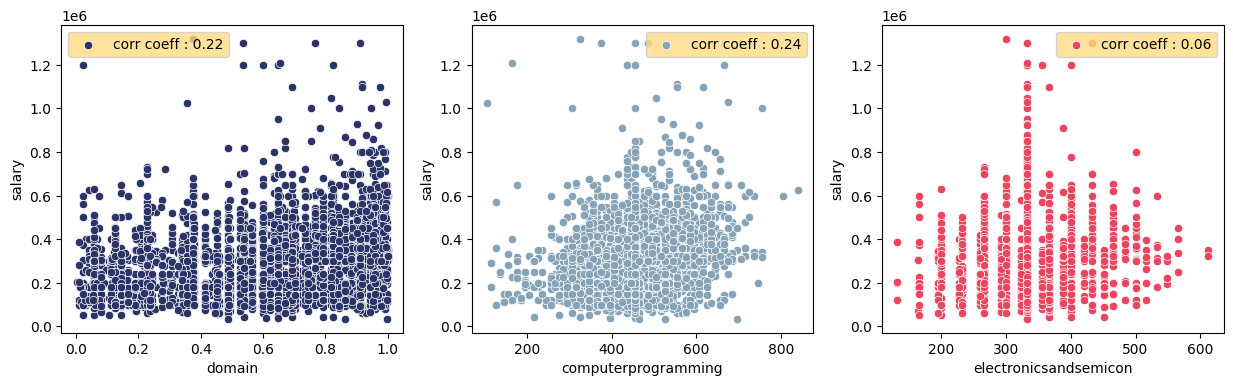

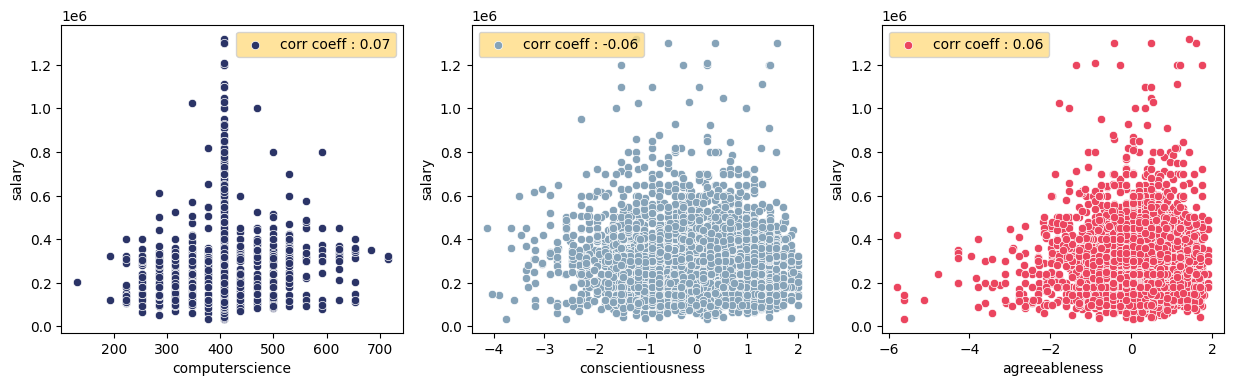

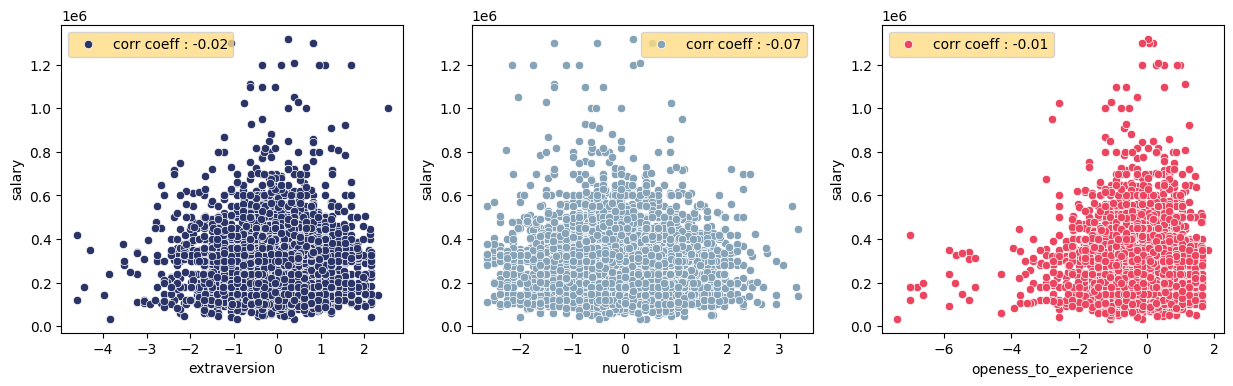

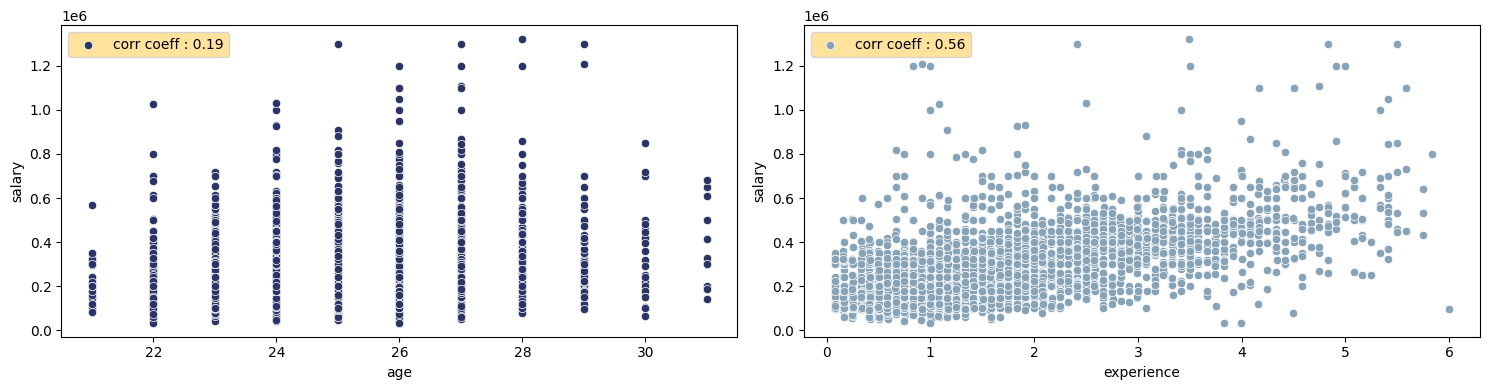

In [ ]:
columns = [['10percentage', '12percentage', 'collegegpa'],
['english', 'logical', 'quant'],
['domain','computerprogramming', 'electronicsandsemicon'],
['computerscience','conscientiousness', 'agreeableness'],
['extraversion', 'nueroticism','openess_to_experience'],
['age', 'experience'] ]

color = { 0:'#2B3467', 1: '#86A3B8',  2: '#EB455F'}
for arr in columns:
  fig , ax = plt.subplots(1,len(arr) ,figsize = (15,4))
  for i,col in enumerate(arr):
    corr = np.round(np.corrcoef(no_out_df["salary"], no_out_df[col])[0,1],2)
    sns.scatterplot(data=no_out_df, x=col , y = 'salary' , label = f'corr coeff : {corr}' , ax=ax[i] , color = color[i])
    ax[i].legend(facecolor='#FFDD83')


plt.tight_layout()
plt.show()

**Observation**

* Salary vs experience shows a 0.56 correlation. which is incdication of positive correlation between salary and experience

* Haven't observed any other major relation between other columns and salary.

**Relation between Salary and categorical variables**

**Salary and gender:**

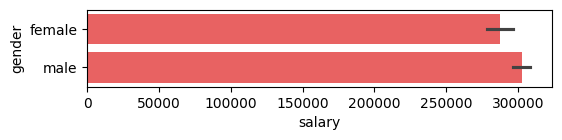

In [ ]:
plt.figure(figsize=(6,1))
sns.barplot(data=no_out_df, y = 'gender', x = 'salary' , color=(1,0,0) , alpha = 0.7)
plt.show()

**Observation**
* We could observe that the average salary for male and female are appromimately equal. so there is no gender bias in case of salary.

**Salary and degree**

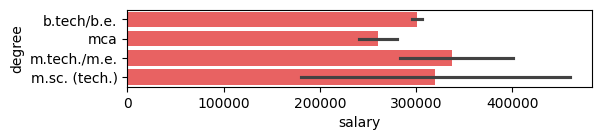

In [ ]:
plt.figure(figsize=(6,1))
sns.barplot(data=no_out_df, y = 'degree', x = 'salary' , color=(1,0,0) , alpha = 0.7)
plt.show()

**Observation**

* Respondent who done master degrees has slightly high salary than undegraduates.

**Salary and Specialization:**

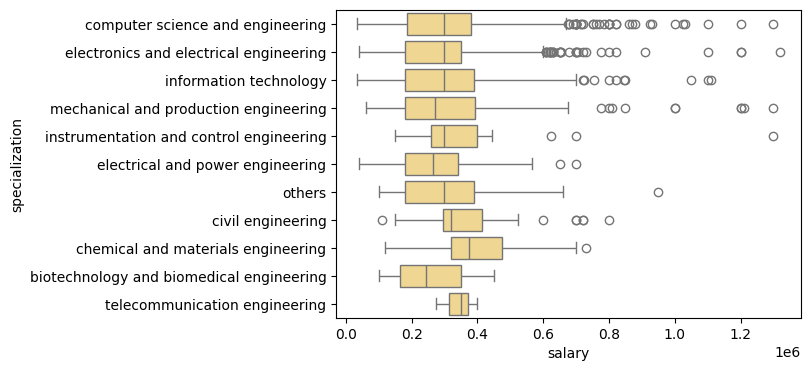

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=no_out_df, y = 'specialization', x = 'salary' , color='#FFDD83')
plt.show()

**Observation**
* Computer science and engineering respondents has high outliered salary compared to other specialization.

* But if consider chemical and materials engineering here, we see an assured high salary range than other specialization.

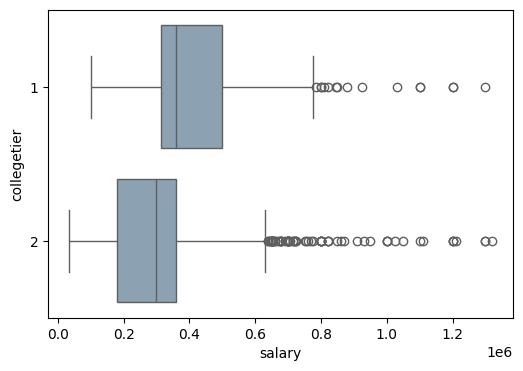

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=no_out_df, y = 'collegetier', x = 'salary' , color='#86A3B8')
plt.show()

**Observation**

* Respondents who studied in the high tier colleges has a high range of salary package


#Research Questions

**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.**

<ipython-input-518-51e63f91f2bf>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  temp = temp[temp.designation.str.contains('^(software engineer|associate engineer|hardware engineer|programmer analyst)$')]


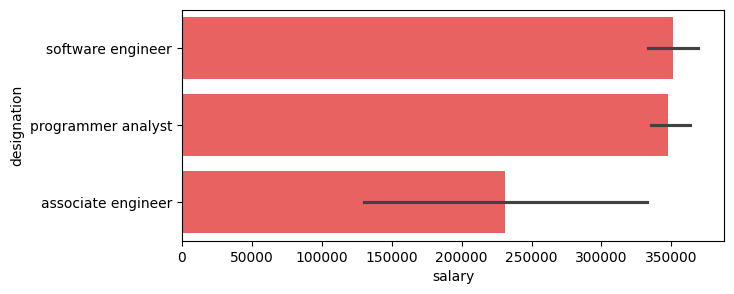

In [ ]:
temp = no_out_df[no_out_df['specialization'] == 'computer science and engineering'].copy()
temp = temp[temp.designation.str.contains('^(software engineer|associate engineer|hardware engineer|programmer analyst)$')]

plt.figure(figsize=(7,3))
sns.barplot(data=temp, x = 'salary' , y = 'designation' , color = (1,0,0,.1), alpha = .7)

plt.show()

**Insight**

* Software engineers , programmer analyst and associate engineers are earning a salary in between 2.5 to 3.5 lakh per annum.

**Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?**

<ipython-input-519-398004e9b08f>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#ff0000'` for the same effect.

  sns.countplot(data = no_out_df.sample(500) , y = 'specialization' , hue = 'gender' , color=(1,0,0), alpha = 0.8 )


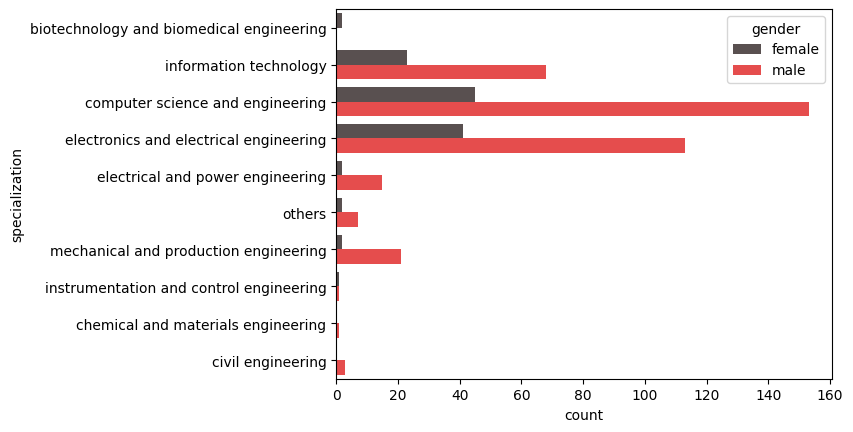

In [ ]:
sns.countplot(data = no_out_df.sample(500) , y = 'specialization' , hue = 'gender' , color=(1,0,0), alpha = 0.8 )
plt.show()

**Insights**

* Male is predominantly choosing computer science , IT and electonic enigneering


# Conclusion

**Understanding Data:**

The dataset, which focuses on the goal variable Salary, includes the job outcomes of engineering graduates. It also contains standardised scores in three different domains: personality, technical, and cognitive skills.

**Data manipulation:**

The dataset is initially observed to have 40 columns and 4000 rows.
There are a lot of duplicate values in the dataset, which makes data processing necessary.
First, we eliminate any unnecessary rows and columns.
Next, we determine whether any missing values (NaN) exist.
We start with data cleaning and then move on to visualisation.


**Univariate Analysis**

Plots such as Histograms, Box Plots, KDE are all included in univariate analysis.


**Bi-variable analysis**

Pie charts, scatterplots, and barplots are examples of bivariate analysis tools.

This approach facilitates percentage comparisons among many variables.



<Center>The End </Center>
<Center>Auther : Yousuf Ali </Center>
<Center><a href = 'https://www.linkedin.com/in/yousuf-ali-p/'> Find me in Linkedin </a><Center>